- International reputation: https://earlygame.com/fifa/fifa-ratings-explained-overall-rating
- Work rate: https://en.wikipedia.org/wiki/Work_rate
- Body Type: https://www.gamersdecide.com/articles/fifa-22-best-body-types
- Potential, Player Traints, Player tags: https://www.fifa-infinity.com/fifa-22/fifa-22-player-status-tags-and-traits-explained/
- Fifa Stats: https://www.fifplay.com/fifa-22-player-attributes/


- work rate = attacking/defending

In [131]:
# Fix league_level

import pandas as pd
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta
import numpy as np
from scipy.stats import truncnorm 
import functools
from matplotlib import font_manager, rcParams, rcParamsDefault
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

sns.set_theme()
sns.set_style("whitegrid")

Add cluster and regression for data understadning
Add transformation to change distribution to normal for preparing data for modeling

In [132]:
df = pd.read_excel("Player_FIFA22.xlsx")

# Data Exploration

In [133]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,234999,Jean,Jean Paulo Fernandes Filho,GK,71,75,2000000.0,500.0,25.0,1995-10-26,...,28,14,11,11,71,73,68,74,75,29.0
1,241115,R. Amaral,Rodrigo Nahuel Amaral Pereira,CAM,71,75,2700000.0,500.0,24.0,1997-03-25,...,62,27,31,26,7,7,14,10,8,NaN
2,256970,A. Karabec,Adam Karabec,"CAM, CM, LM",71,84,4300000.0,500.0,17.0,2003-07-02,...,69,33,35,48,14,14,8,7,13,NaN
3,259036,V. Korniienko,Viktor Korniienko,LB,71,82,4000000.0,500.0,22.0,1999-02-14,...,72,62,66,71,8,13,8,12,14,NaN
4,244272,D. Perić,Dino Perić,CB,70,71,1600000.0,500.0,26.0,1994-07-12,...,64,63,71,72,14,9,12,11,7,NaN


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18876 entries, 0 to 18875
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sofifa_id                    18876 non-null  int64         
 1   short_name                   18876 non-null  object        
 2   long_name                    18876 non-null  object        
 3   player_positions             18876 non-null  object        
 4   overall                      18876 non-null  int64         
 5   potential                    18876 non-null  int64         
 6   value_eur                    18802 non-null  float64       
 7   wage_eur                     18815 non-null  float64       
 8   age                          18867 non-null  float64       
 9   dob                          18876 non-null  datetime64[ns]
 10  height_cm                    18876 non-null  int64         
 11  weight_kg                    18876 non-nu

In [135]:
df.shape

(18876, 75)

In [136]:
df.columns

Index(['sofifa_id', 'short_name', 'long_name', 'player_positions', 'overall',
       'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm',
       'weight_kg', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_loaned_from',
       'club_joined', 'club_contract_valid_until', 'nationality_id',
       'nationality_name', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_ag

In [137]:
general_information_index = ["sofifa_id", "short_name", "long_name", "player_positions", "overall", "value_eur", "age", "dob", "height_cm", "weight_kg", 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face']
club_information_index = ['club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until']
nation_information_index = ['nationality_id', 'nationality_name', 'nation_position', 'nation_jersey_number']
player_stats = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

mycarrer_index = ["potential", "wage_eur", 'release_clause_eur', 'player_tags', 'player_traits']

physical_category_index = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_jumping', 'power_stamina', 'power_strength']
skill_category_index = ["attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'power_shot_power', 'power_long_shots', 'defending_standing_tackle', 'defending_sliding_tackle', ]
mental_category_index = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness']

attacking_index = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
skill_index = ['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']
movement_index =  ['movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance']
power_index = ['power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']
mentality_index = ['mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure']
defending_index = ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']
goalkeeping_index = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [138]:
null_series = df.isnull().sum() / df.shape[0]
null_series.loc[null_series > 0]

value_eur                    0.003920
wage_eur                     0.003232
age                          0.000477
club_name                    0.003232
league_name                  0.004715
league_level                 0.003232
club_position                0.003232
club_jersey_number           0.003232
club_loaned_from             0.941884
club_joined                  0.061348
club_contract_valid_until    0.005245
nation_position              0.959790
nation_jersey_number         0.959790
release_clause_eur           0.062036
player_tags                  0.923660
player_traits                0.503497
pace                         0.109292
shooting                     0.109292
passing                      0.109292
dribbling                    0.109292
defending                    0.109292
physic                       0.109292
goalkeeping_speed            0.890708
dtype: float64

## Univariate Plot

In [139]:
# TODO: Plot sofifa_id

[Text(0, 0.5, 'Short Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Ranking Plot of Short Name')]

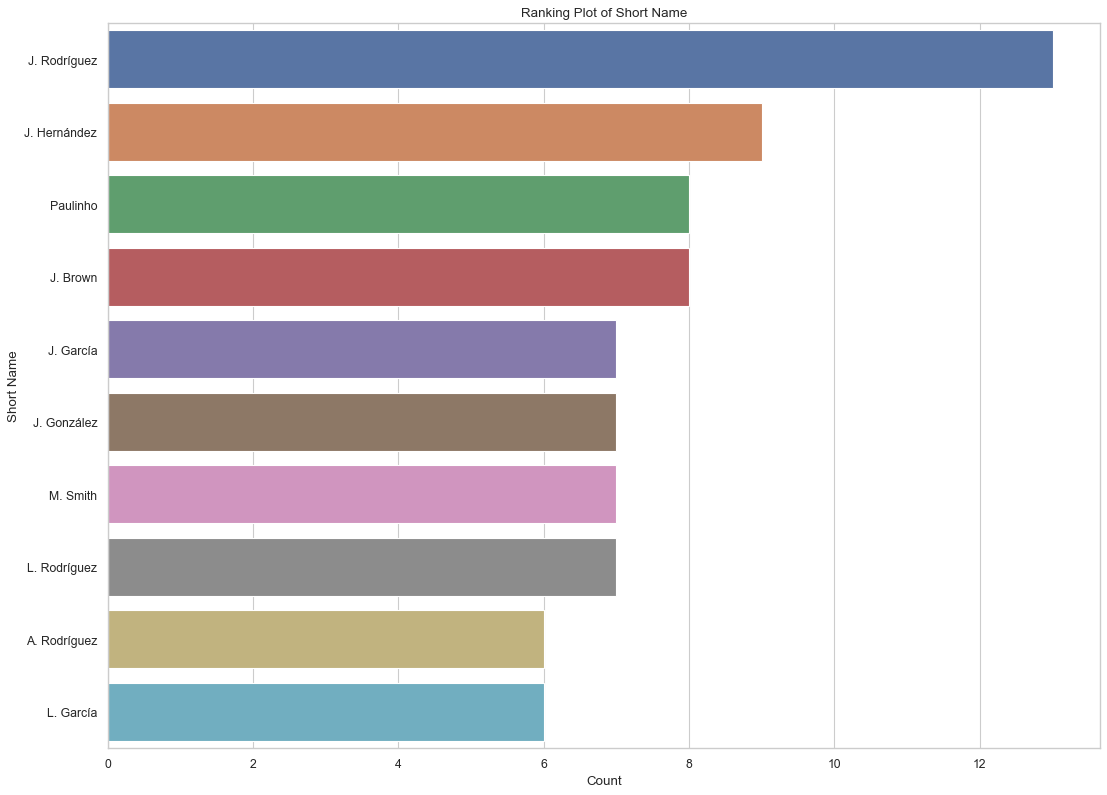

In [140]:
short_name_df = df["short_name"].value_counts().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="short_name", y="index", orient="h", data=short_name_df)
ax.set(xlabel="Count", ylabel="Short Name", title="Ranking Plot of Short Name")

[Text(0, 0.5, 'Long Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Rank Plot of Long Name')]

c:\Users\JUSTIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\JUSTIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\JUSTIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\JUSTIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\JUSTIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26446 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\JUSTIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24069 missing fr

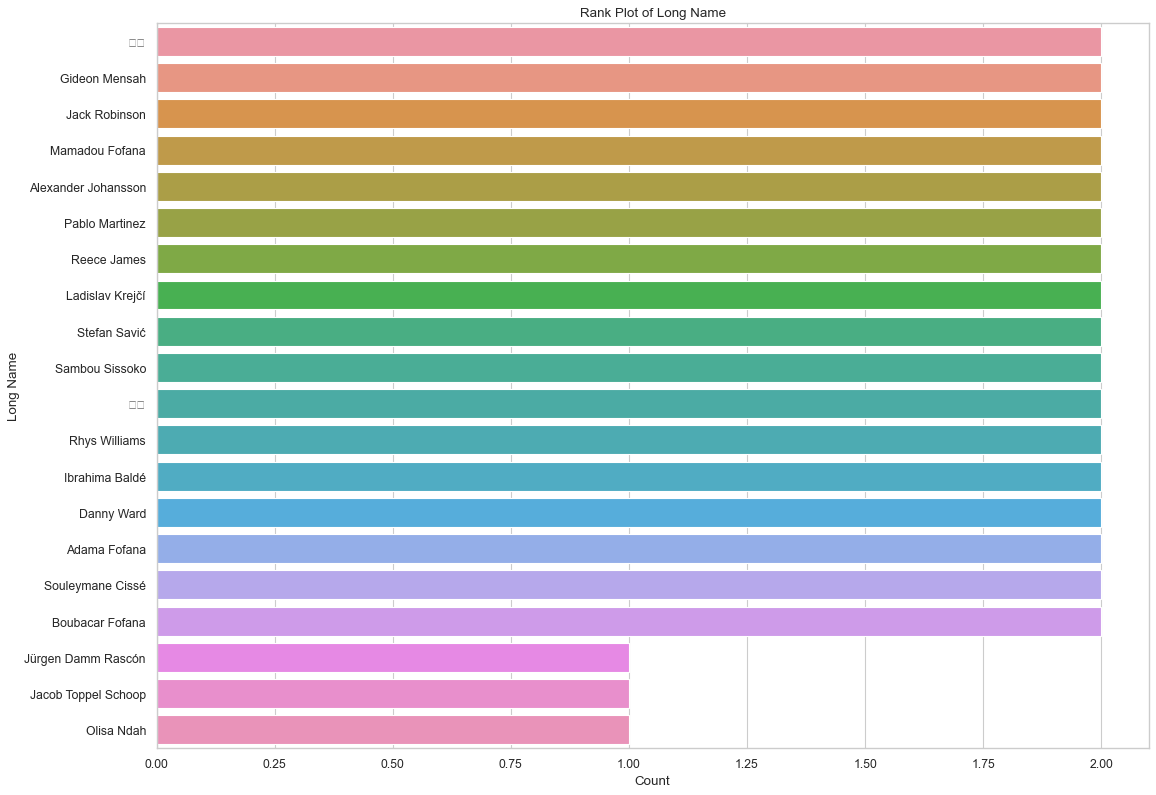

In [141]:
long_name_df = df["long_name"].value_counts().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="long_name", y="index", orient="h", data=long_name_df)
ax.set(xlabel="Count", ylabel="Long Name", title="Rank Plot of Long Name")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Player Position'),
 Text(0.5, 1.0, 'Bar Plot of Player Position')]

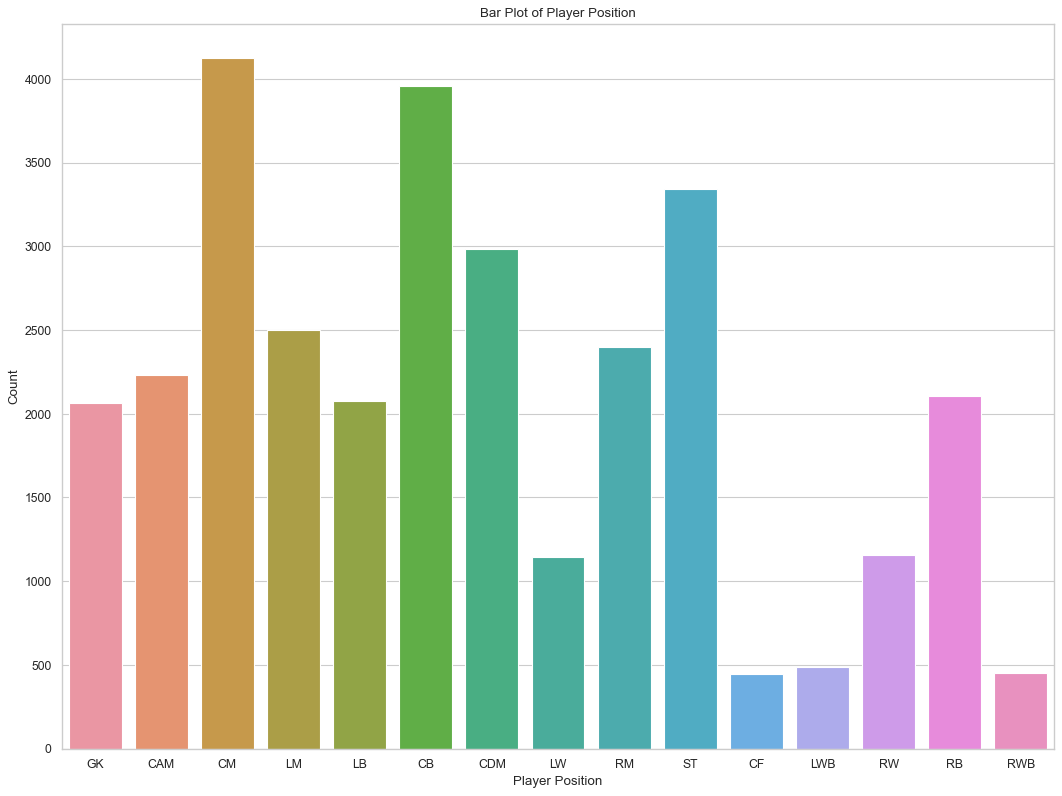

In [142]:
player_position_dict = {}
player_position_split = df["player_positions"].str.split(", ").values
for positions in player_position_split:
    for position in positions:
        if position in player_position_dict:
            player_position_dict[position] += 1
        else:
            player_position_dict[position] = 1

player_position_df = pd.Series(player_position_dict).reset_index()
player_position_df.columns = ["Index", "Count"]

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="Index", y="Count", data=player_position_df)
ax.set(xlabel="Player Position", ylabel="Count", title="Bar Plot of Player Position")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Potential'),
 Text(0.5, 1.0, 'Histogram of Potential')]

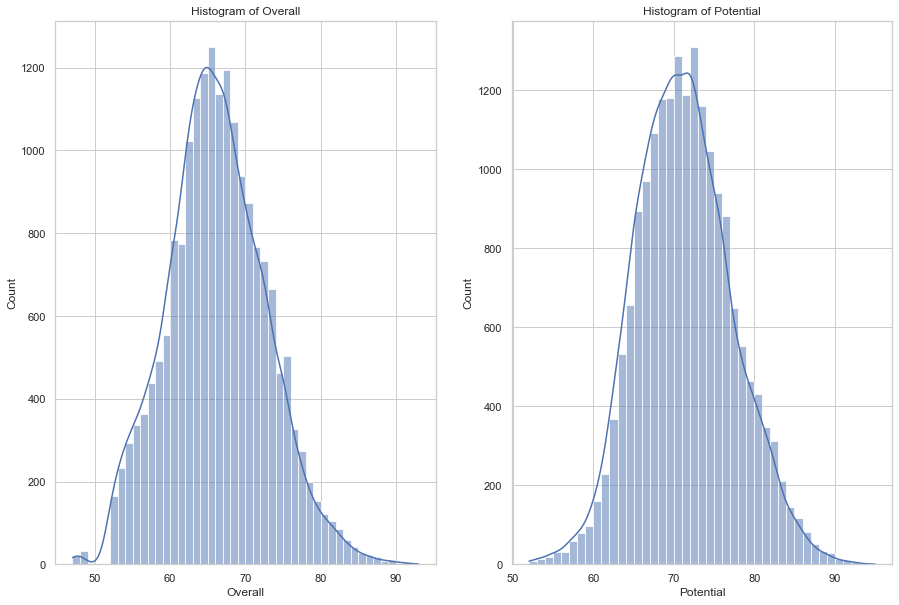

In [143]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 10)


sns.histplot(data=df, x="overall", ax=axes[0], binwidth=1, kde=True)
axes[0].set(xlabel="Overall", ylabel="Count", title="Histogram of Overall")

sns.histplot(data=df, x="potential", ax=axes[1], binwidth=1, kde=True)
axes[1].set(xlabel="Potential", ylabel="Count", title="Histogram of Potential")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Wage Euro'),
 Text(0.5, 1.0, 'Histogram of Wage Euro')]

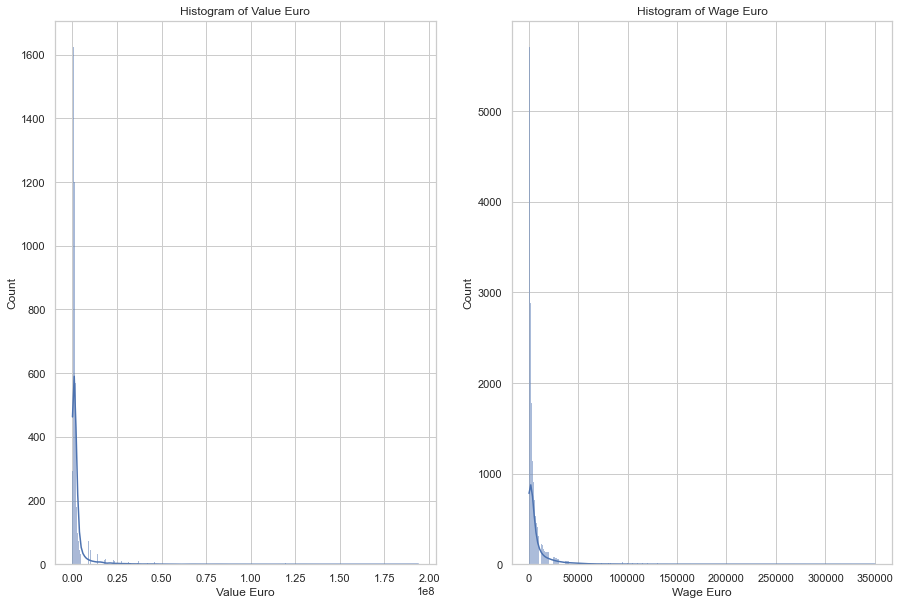

In [144]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 10)


sns.histplot(data=df, x="value_eur", ax=axes[0], kde=True)
axes[0].set(xlabel="Value Euro", ylabel="Count", title="Histogram of Value Euro")

sns.histplot(data=df, x="wage_eur", ax=axes[1], kde=True)
axes[1].set(xlabel="Wage Euro", ylabel="Count", title="Histogram of Wage Euro")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Histogram of Age')]

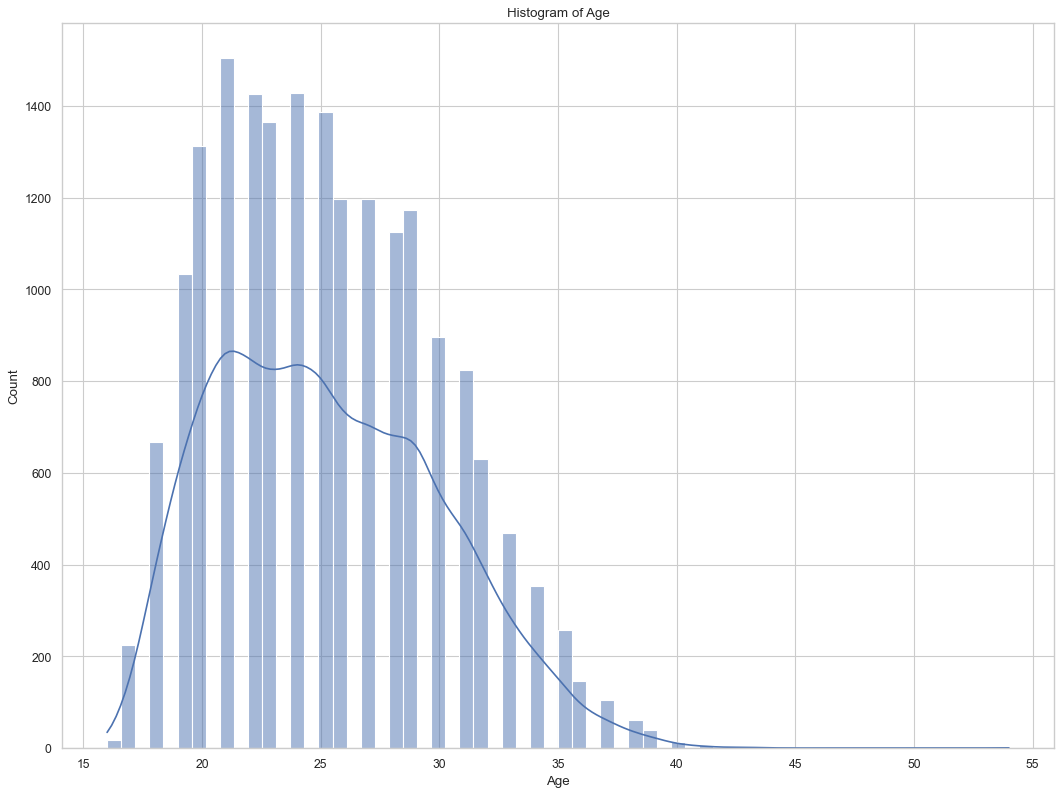

In [145]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="age", kde=True)
ax.set(xlabel="Age", ylabel="Count", title="Histogram of Age")

In [146]:
# TODO: Plot the date of birth feature

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weight (Kg)'),
 Text(0.5, 1.0, 'Histogram of Weight (Kg)')]

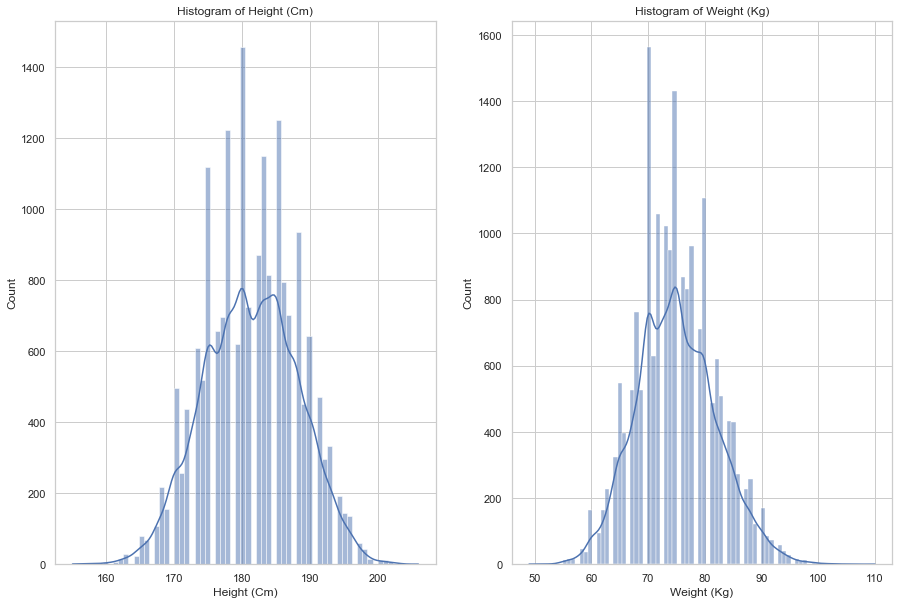

In [147]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 10)


sns.histplot(data=df, x="height_cm", ax=axes[0], kde=True)
axes[0].set(xlabel="Height (Cm)", ylabel="Count", title="Histogram of Height (Cm)")

sns.histplot(data=df, x="weight_kg", ax=axes[1], kde=True)
axes[1].set(xlabel="Weight (Kg)", ylabel="Count", title="Histogram of Weight (Kg)")

[Text(0, 0.5, 'Club Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Ranking Plot of Club Name')]

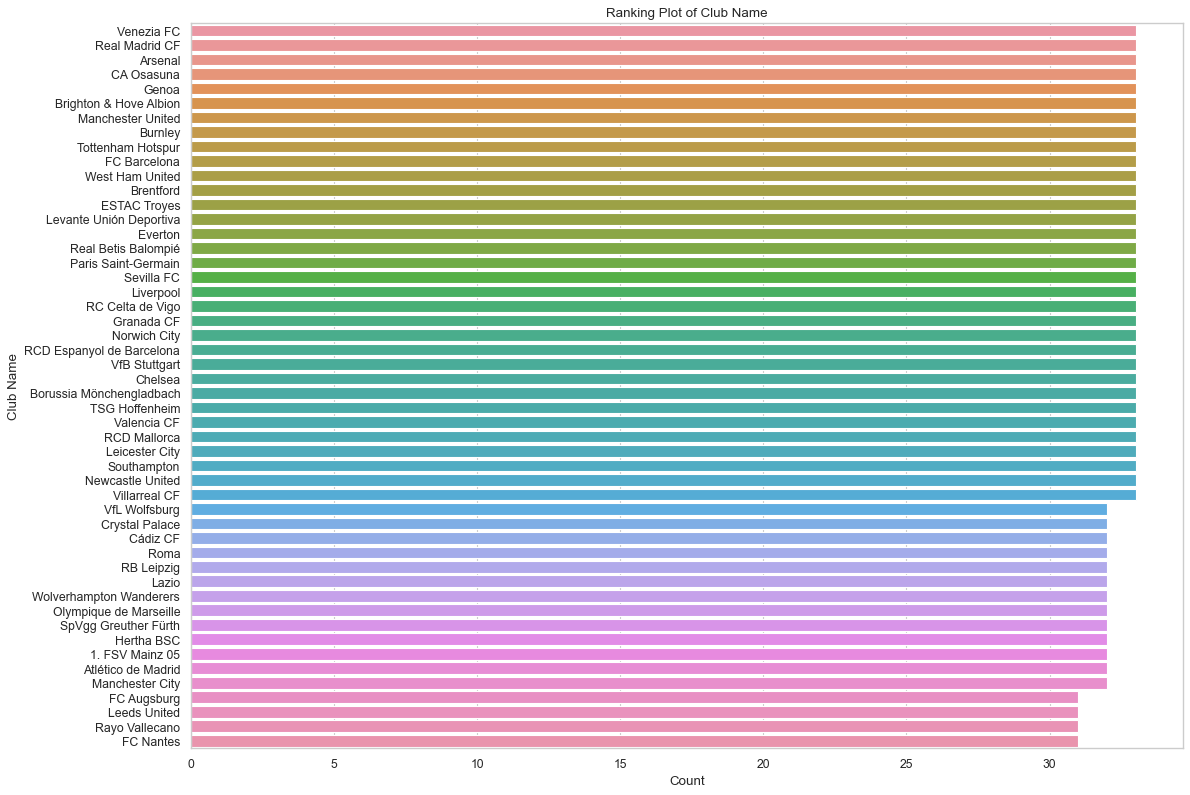

In [148]:
club_name_df = df["club_name"].value_counts().sort_values(ascending=False).head(50).reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="club_name", y="index", orient="h", data=club_name_df)
ax.set(xlabel="Count", ylabel="Club Name", title="Ranking Plot of Club Name")

[Text(0, 0.5, 'League Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Ranking Plot of League Name')]

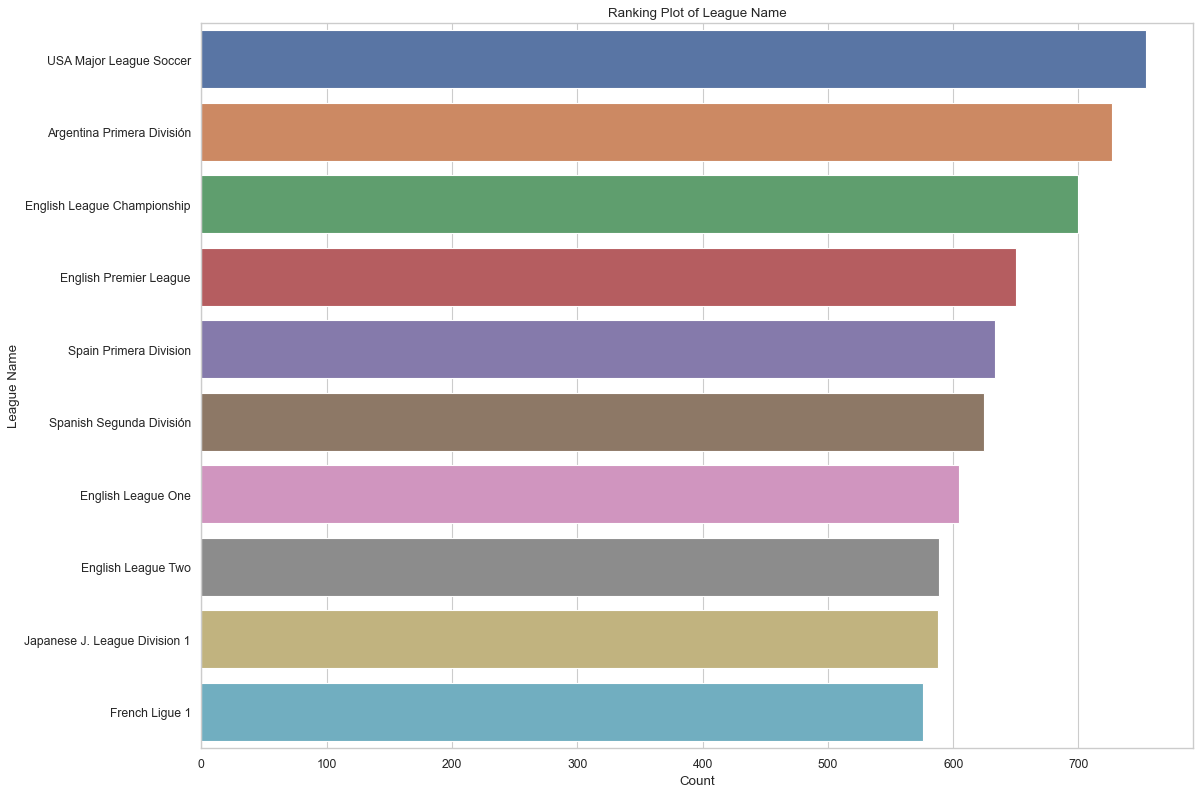

In [149]:
league_name_df = df["league_name"].value_counts().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="league_name", y="index", orient="h", data=league_name_df)
ax.set(xlabel="Count", ylabel="League Name", title="Ranking Plot of League Name")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'League Level'),
 Text(0.5, 1.0, 'Histogram of League Level')]

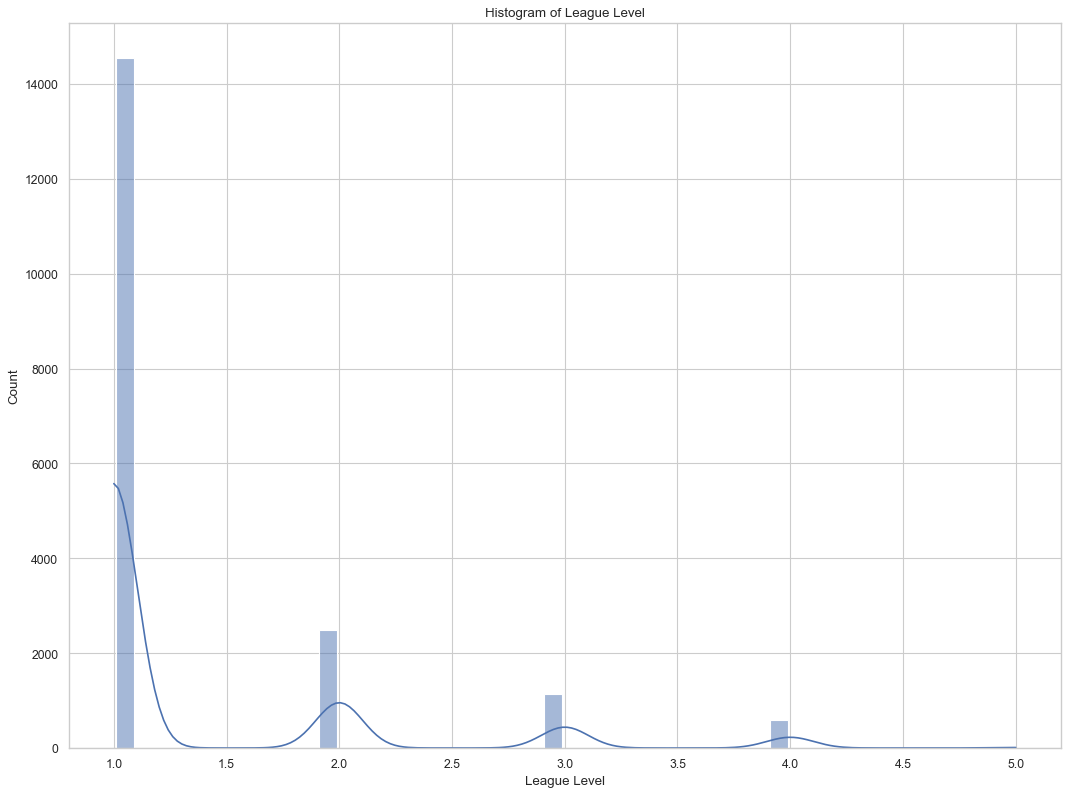

In [150]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="league_level", binwidth=0.1, kde=True, shrink=0.8)
ax.set(xlabel="League Level", ylabel="Count", title="Histogram of League Level")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'League Level'),
 Text(0.5, 1.0, 'Bar Plot of League Level')]

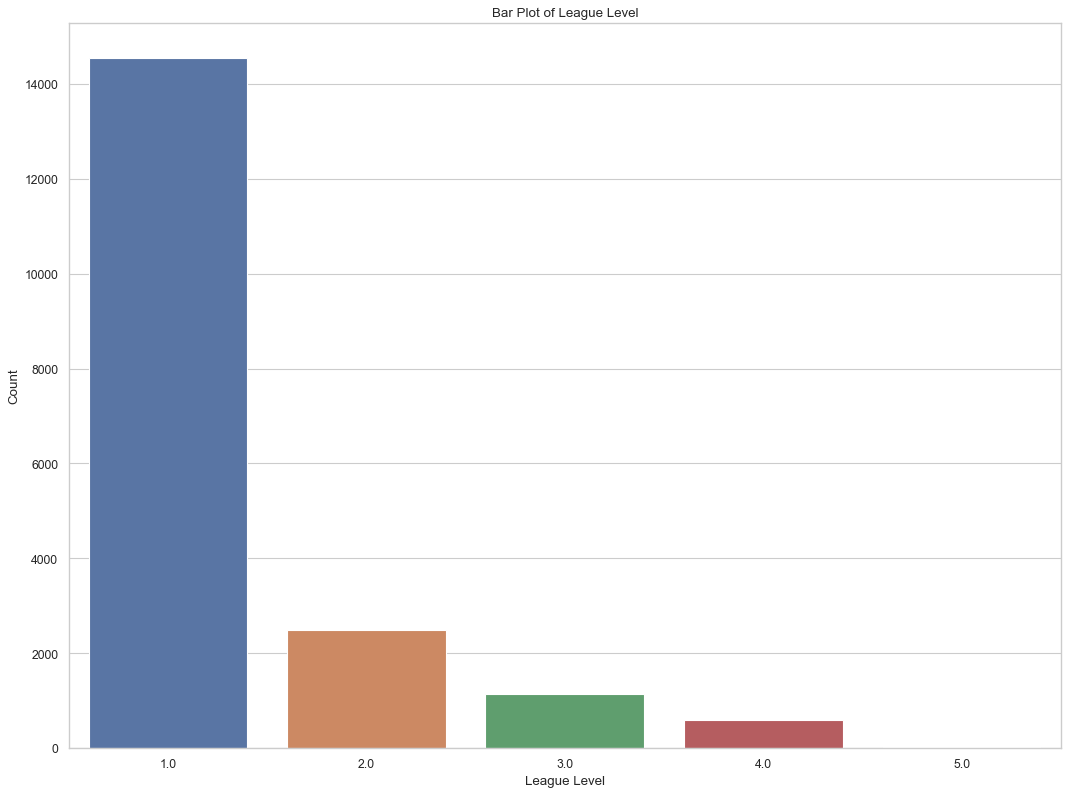

In [151]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.countplot(data=df, x="league_level")
ax.set(xlabel="League Level", ylabel="Count", title="Bar Plot of League Level")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Club Position'),
 Text(0.5, 1.0, 'Ranking Plot of Club Position')]

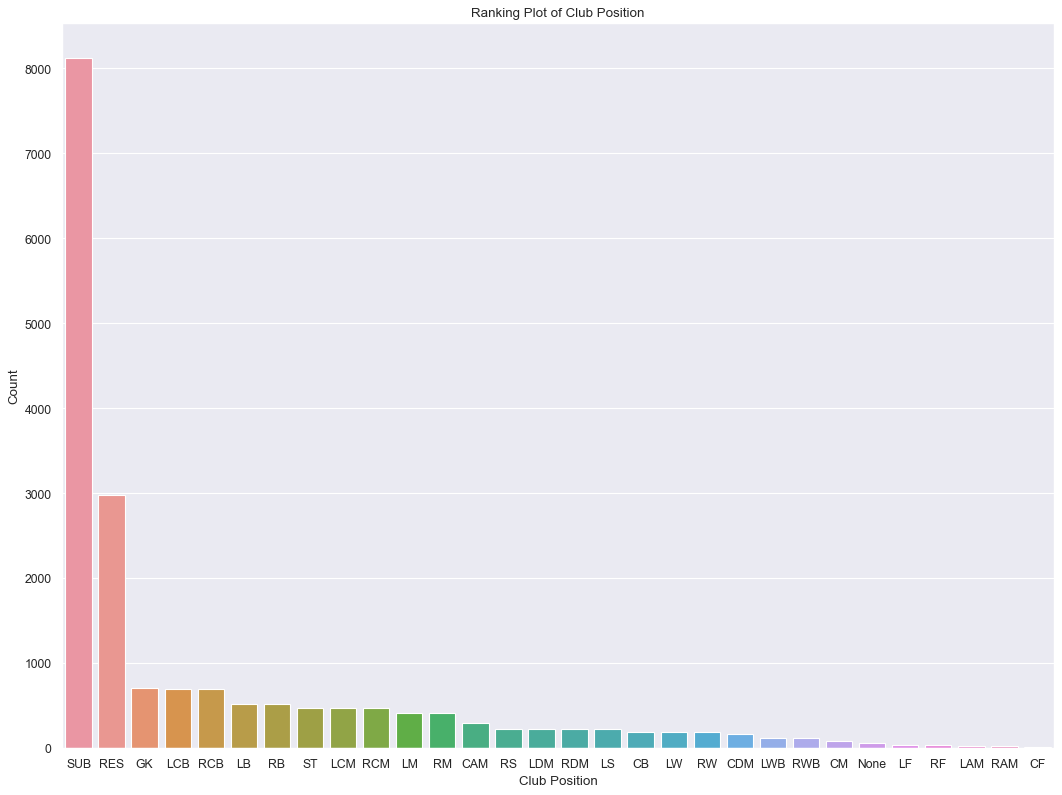

In [237]:
club_position_df = df["club_position"].value_counts().reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="index", y="club_position",  data=club_position_df)
ax.set(xlabel="Club Position", ylabel="Count", title="Ranking Plot of Club Position")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Club Jersey Number'),
 Text(0.5, 1.0, 'Histogram of Club Jersey Number')]

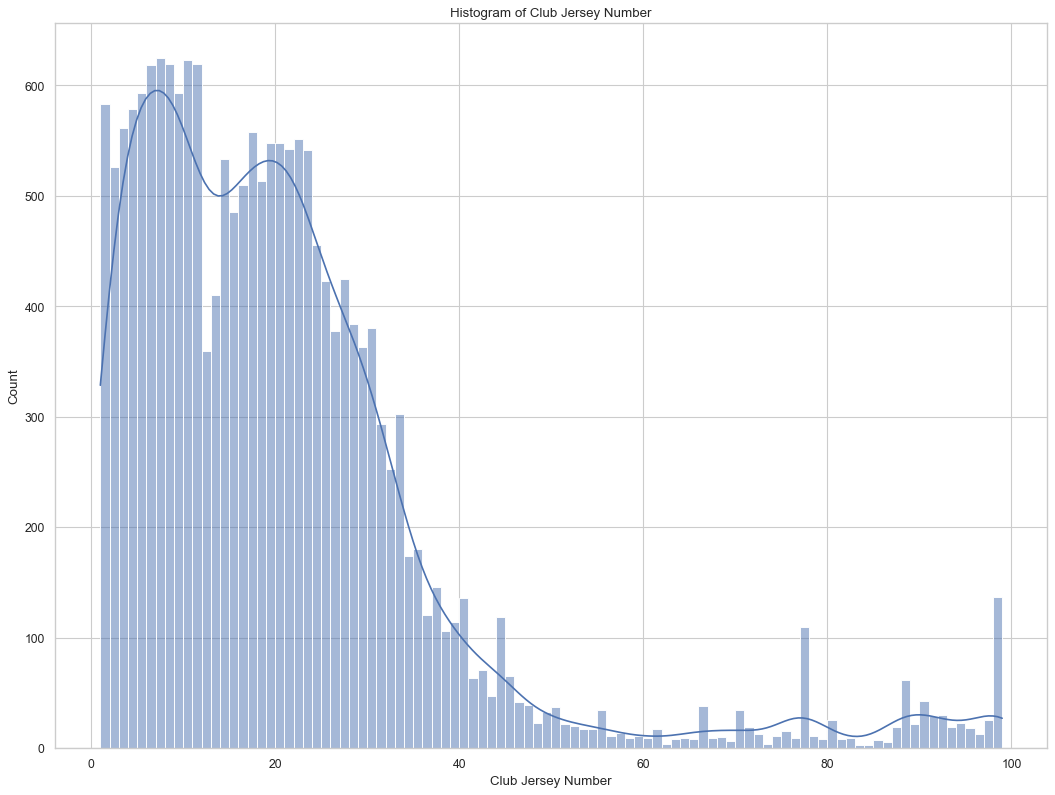

In [153]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="club_jersey_number", binwidth=1, kde=True)
ax.set(xlabel="Club Jersey Number", ylabel="Count", title="Histogram of Club Jersey Number")

[Text(0, 0.5, 'Club Loaned From'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Ranking Plot of Club Loaned From (Bottom 50)')]

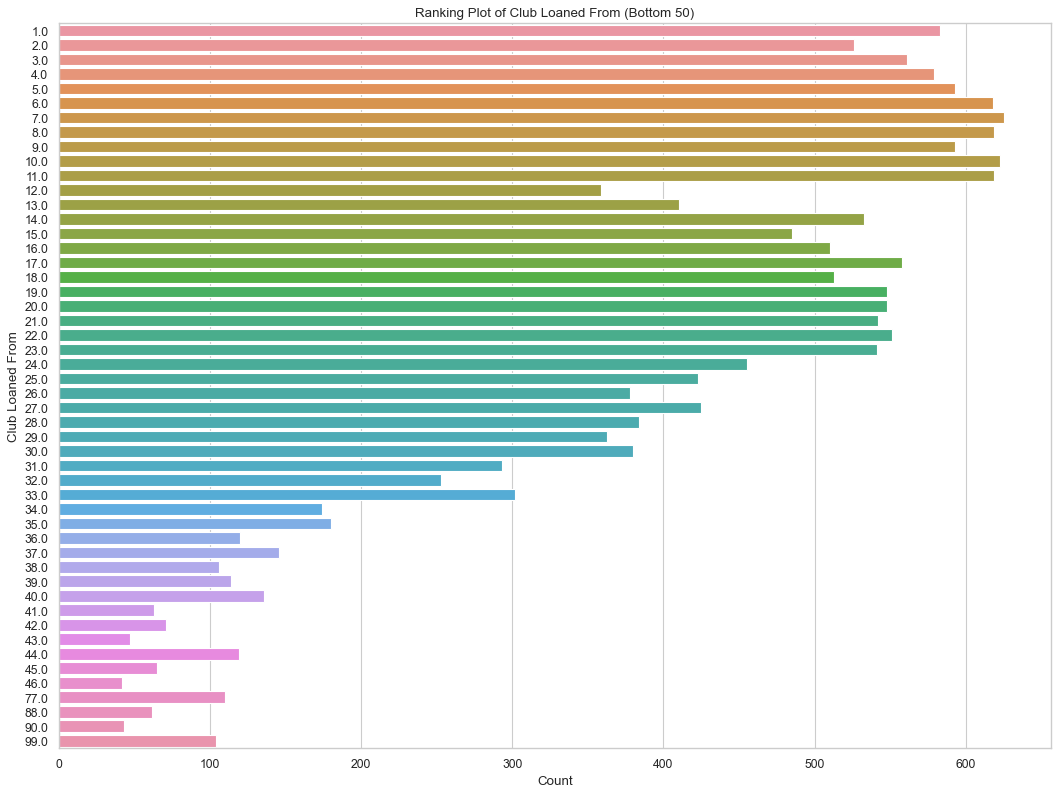

In [154]:
club_jersey_number_df = df["club_jersey_number"].value_counts().sort_values().tail(50).reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(y="index", x="club_jersey_number", orient="h", data=club_jersey_number_df)
ax.set(ylabel="Club Loaned From", xlabel="Count", title="Ranking Plot of Club Loaned From (Bottom 50)")

[Text(0, 0.5, 'Club Loaned From'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Ranking Plot of Club Loaned From')]

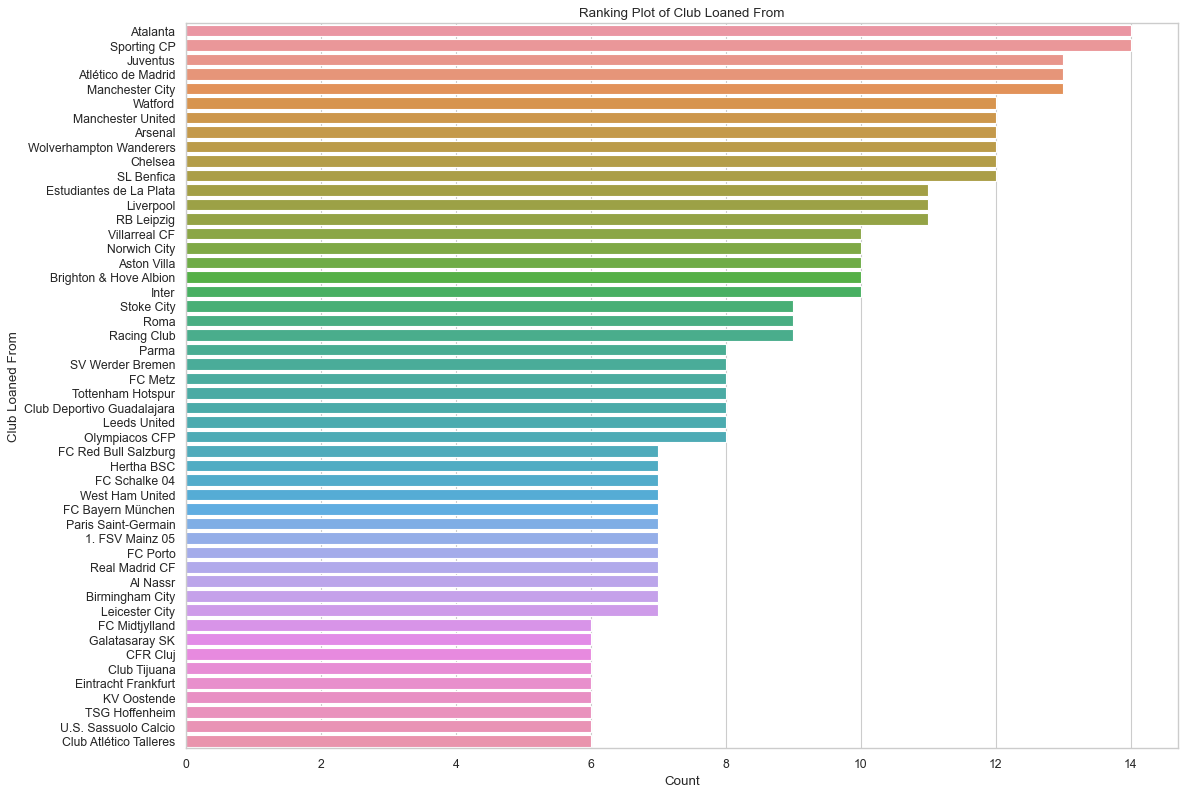

In [155]:
club_loaned_from_df = df["club_loaned_from"].value_counts().sort_values(ascending=False).head(50).reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(y="index", x="club_loaned_from", orient="h", data=club_loaned_from_df)
ax.set(ylabel="Club Loaned From", xlabel="Count", title="Ranking Plot of Club Loaned From")

In [156]:
# TODO: Plot distirbution of club_joined

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Club Contract Valid Until'),
 Text(0.5, 1.0, 'Histogram of Club Contract Valid Until')]

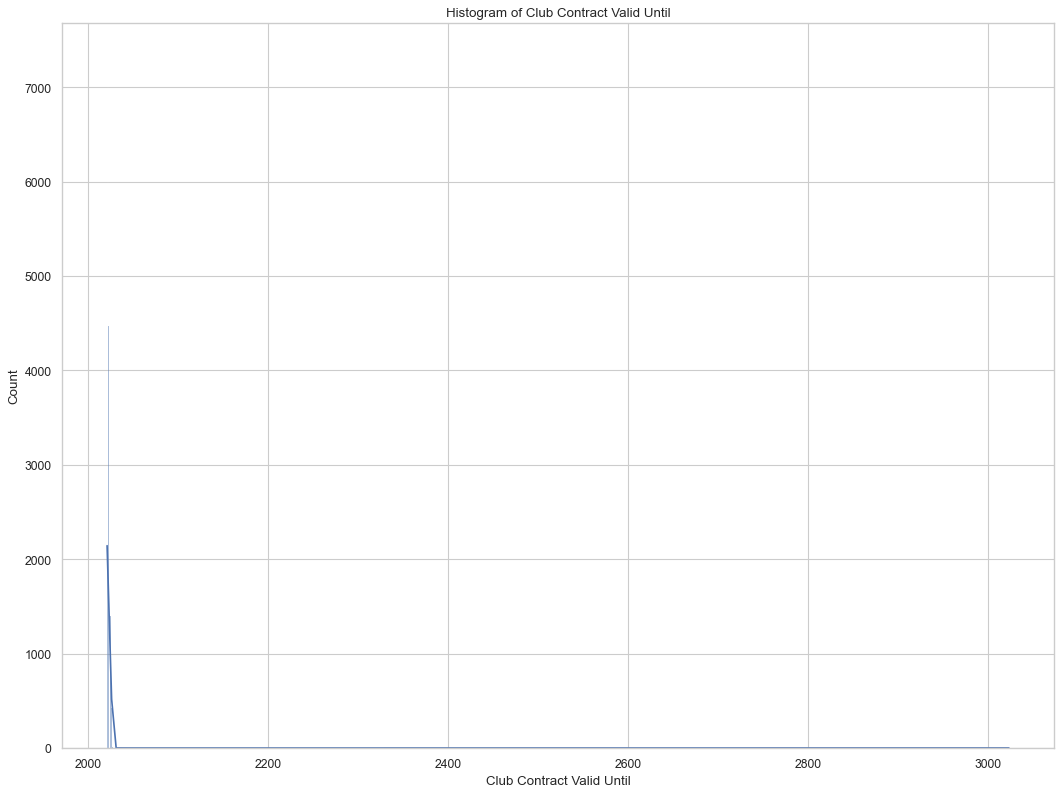

In [157]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="club_contract_valid_until", binwidth=0.75, kde=True)
ax.set(xlabel="Club Contract Valid Until", ylabel="Count", title="Histogram of Club Contract Valid Until")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Club Contract Valid Until'),
 Text(0.5, 1.0, 'Bar Plot of Club Contract Valid Until')]

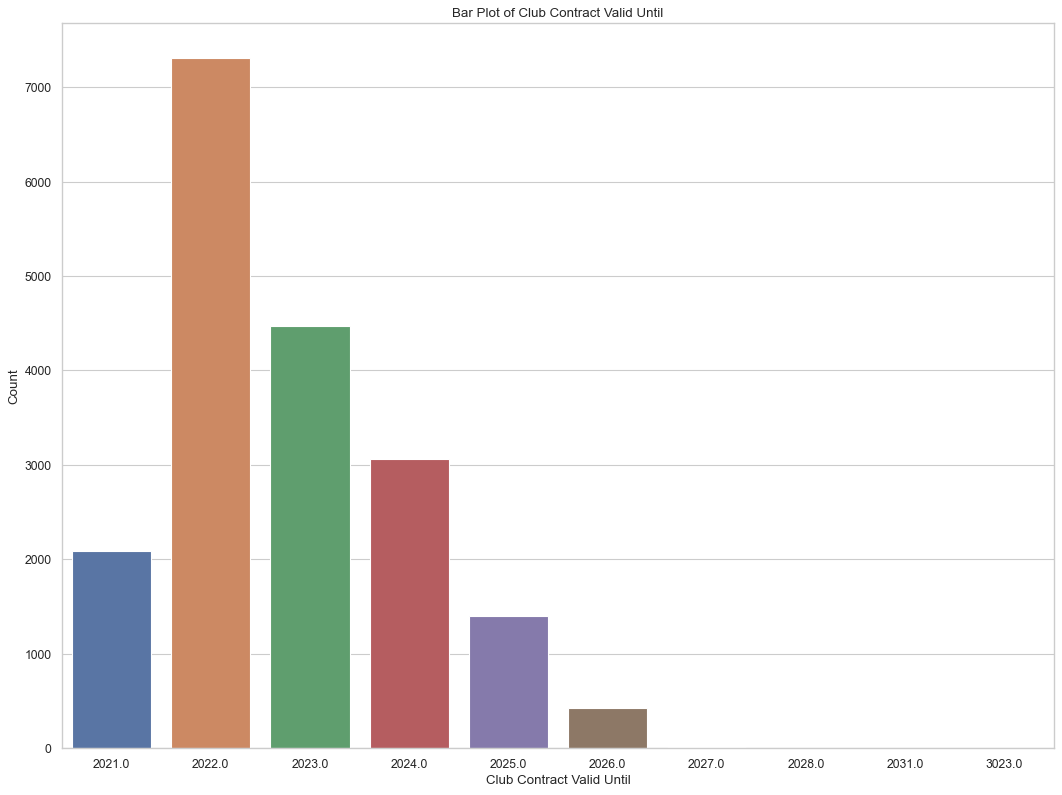

In [158]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.countplot(data=df, x="club_contract_valid_until")
ax.set(xlabel="Club Contract Valid Until", ylabel="Count", title="Bar Plot of Club Contract Valid Until")

In [159]:
# TODO: Plot nationality_id

[Text(0, 0.5, 'Nationality Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Ranking Plot of Nationality Name')]

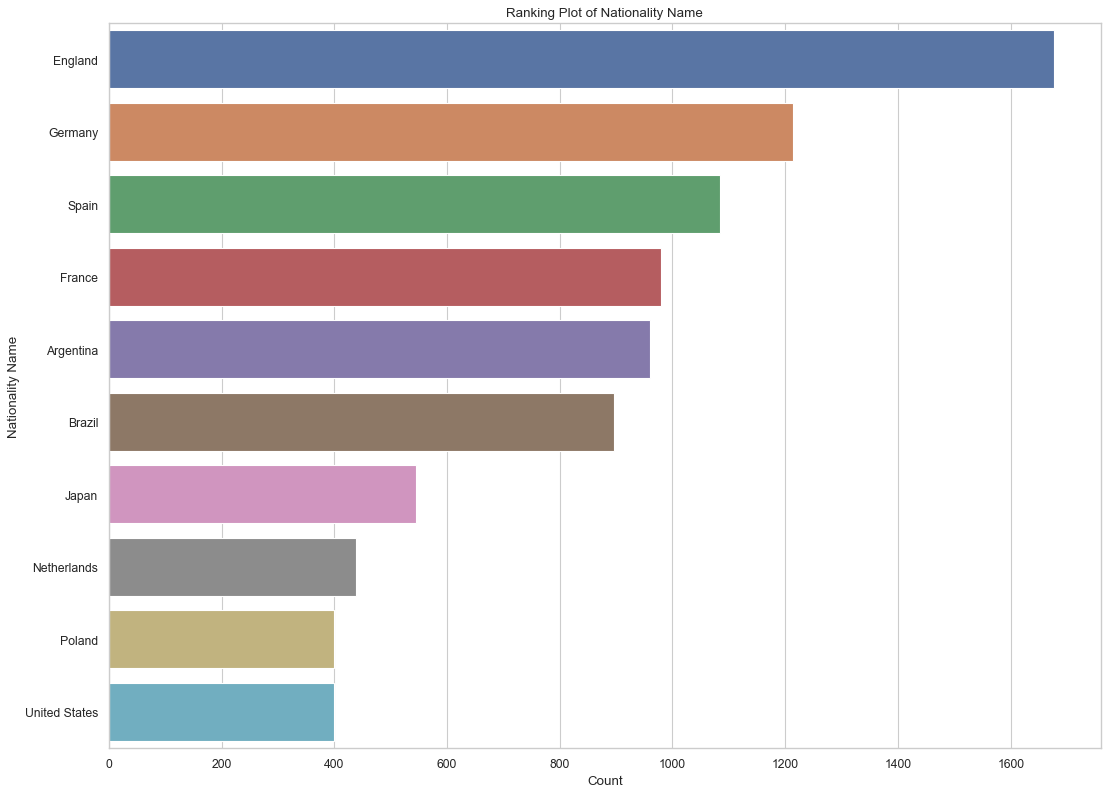

In [160]:
nationality_name_df = df["nationality_name"].value_counts().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="nationality_name", y="index", orient="h", data=nationality_name_df)
ax.set(xlabel="Count", ylabel="Nationality Name", title="Ranking Plot of Nationality Name")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Nation Position'),
 Text(0.5, 1.0, 'Ranking Plot of Nation Position')]

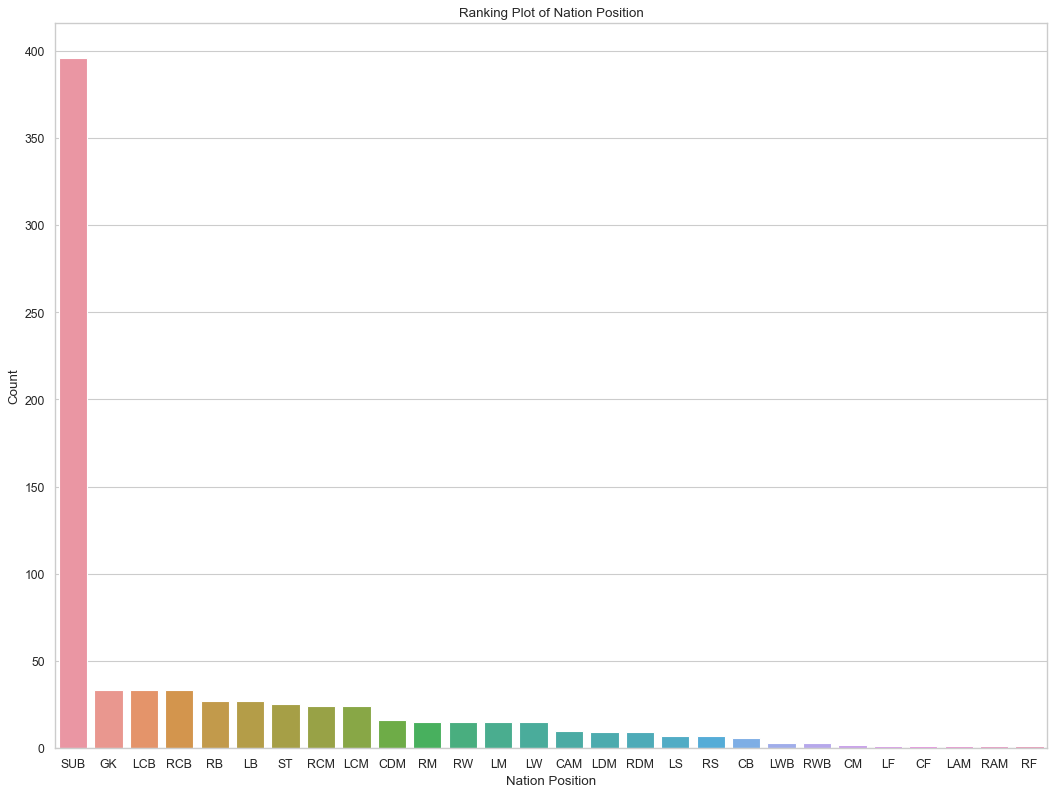

In [161]:
nation_position_df = df["nation_position"].value_counts().reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="index", y="nation_position",  data=nation_position_df)
ax.set(xlabel="Nation Position", ylabel="Count", title="Ranking Plot of Nation Position")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Nation Jersey Number'),
 Text(0.5, 1.0, 'Histogram of Nation Jersey Number')]

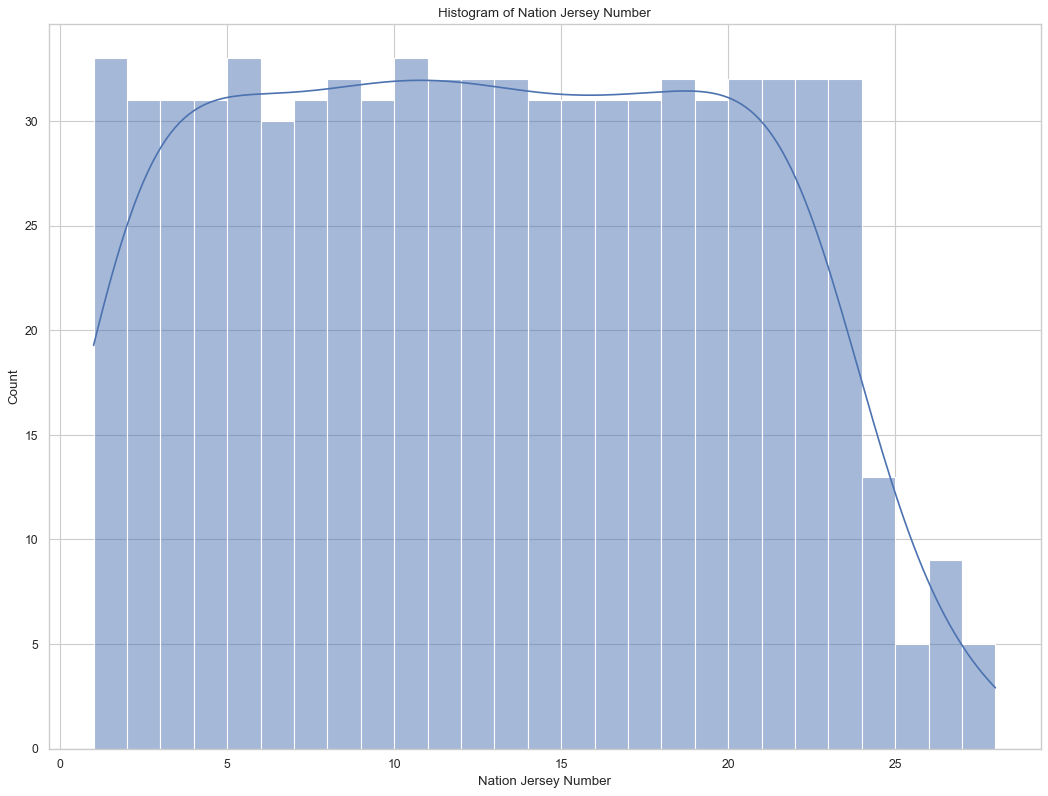

In [162]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="nation_jersey_number", binwidth=1, kde=True)
ax.set(xlabel="Nation Jersey Number", ylabel="Count", title="Histogram of Nation Jersey Number")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Nation Jersey Number'),
 Text(0.5, 1.0, 'Bar Plot of Nation Jersey Number')]

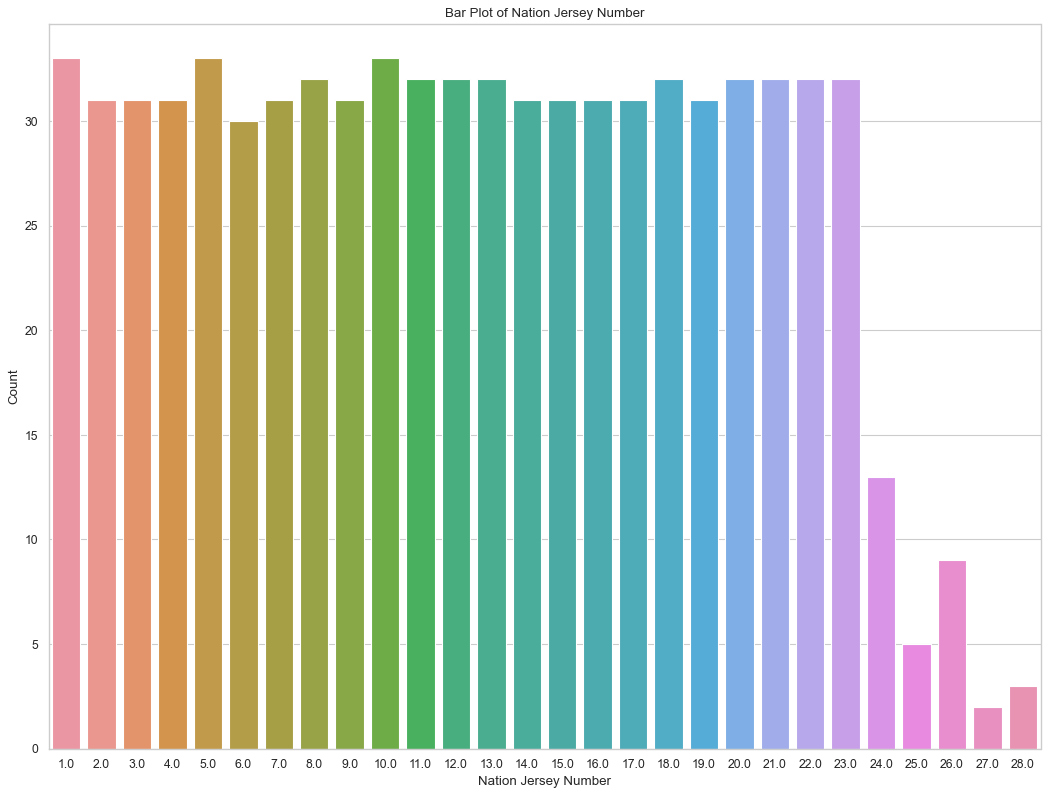

In [163]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.countplot(data=df, x="nation_jersey_number")
ax.set(xlabel="Nation Jersey Number", ylabel="Count", title="Bar Plot of Nation Jersey Number")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Preferred Foot'),
 Text(0.5, 1.0, 'Ranking Plot of Preferred Foot')]

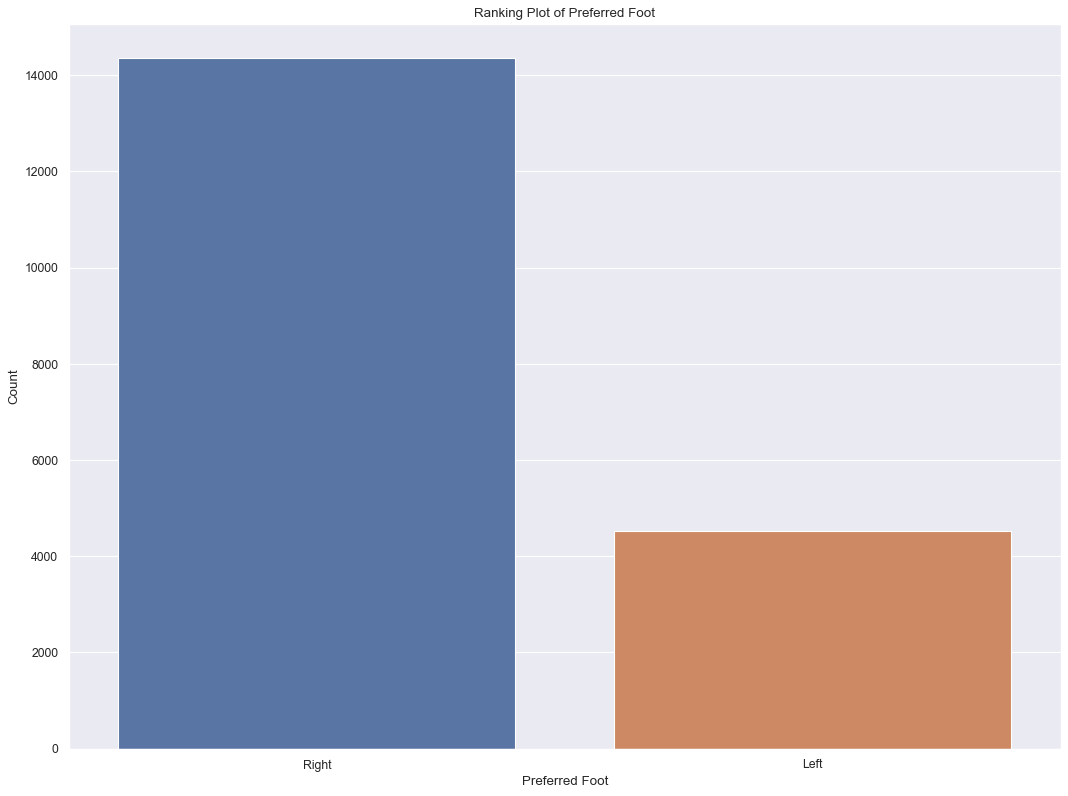

In [236]:
preferred_foot_df = df["preferred_foot"].value_counts().reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="index", y="preferred_foot",  data=preferred_foot_df)
ax.set(xlabel="Preferred Foot", ylabel="Count", title="Ranking Plot of Preferred Foot")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weak Foot'),
 Text(0.5, 1.0, 'Histogram of Weak Foot')]

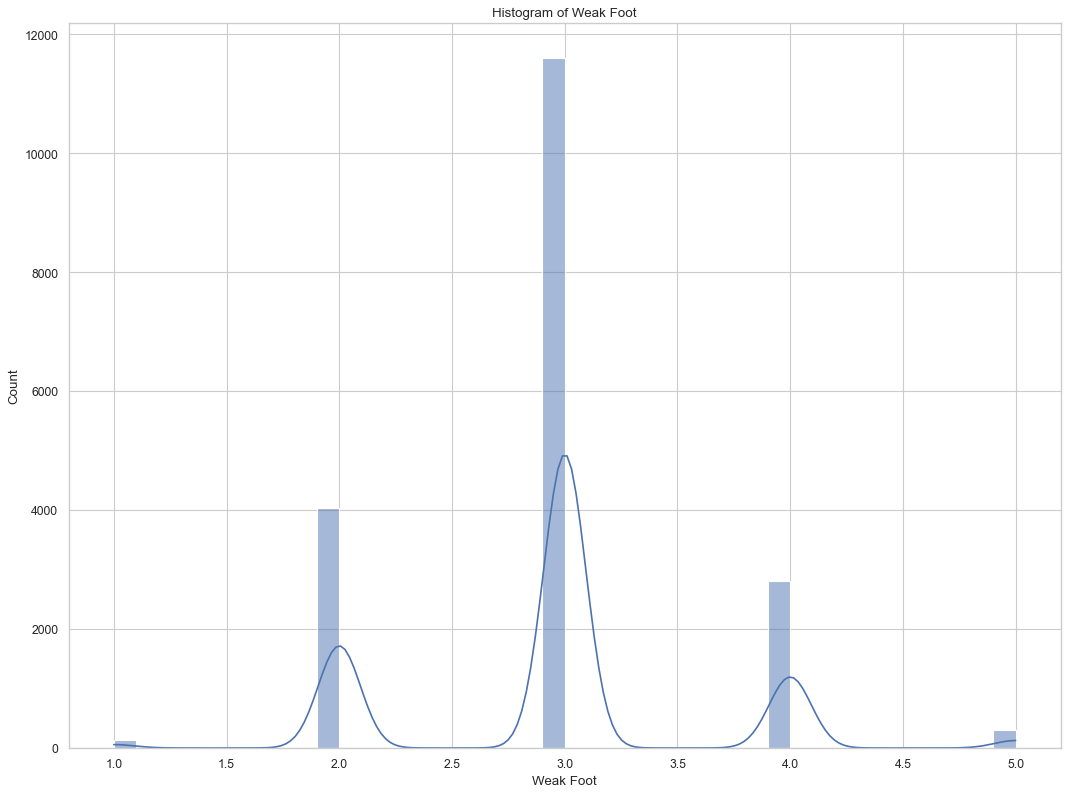

In [165]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="weak_foot", binwidth=0.1, kde=True)
ax.set(xlabel="Weak Foot", ylabel="Count", title="Histogram of Weak Foot")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Skill Moves'),
 Text(0.5, 1.0, 'Histogram of Skill Moves')]

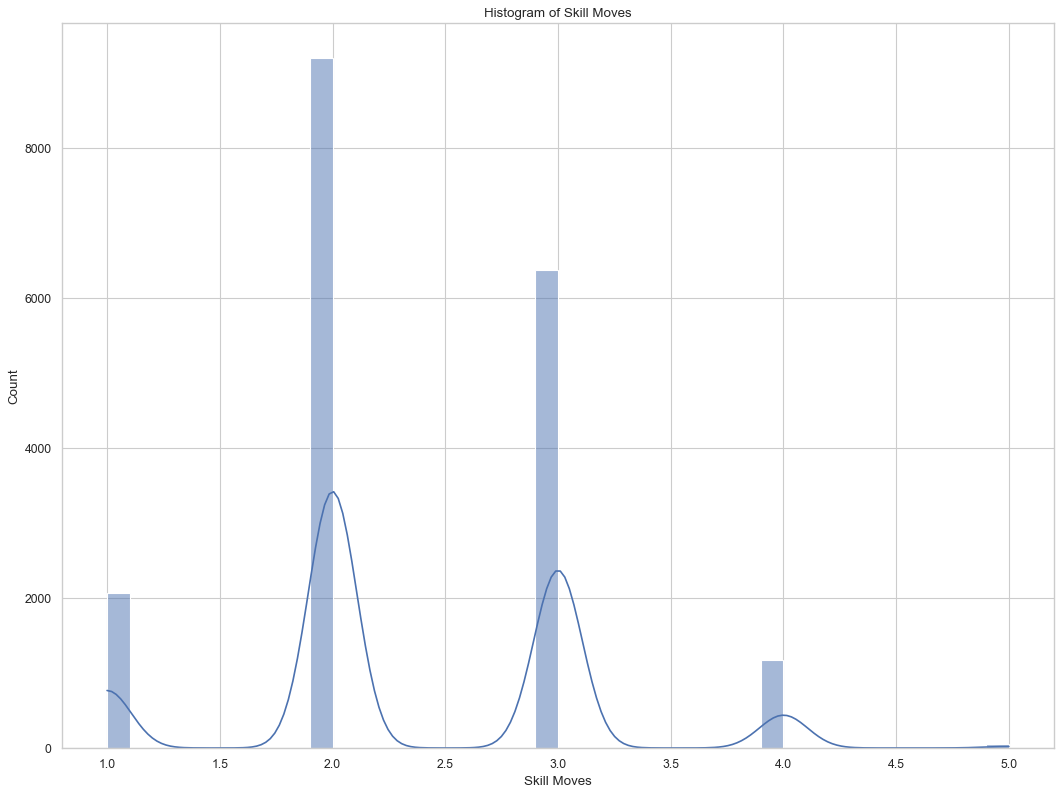

In [166]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="skill_moves", binwidth=0.1, kde=True)
ax.set(xlabel="Skill Moves", ylabel="Count", title="Histogram of Skill Moves")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'International Reputation'),
 Text(0.5, 1.0, 'Histogram of International Reputation')]

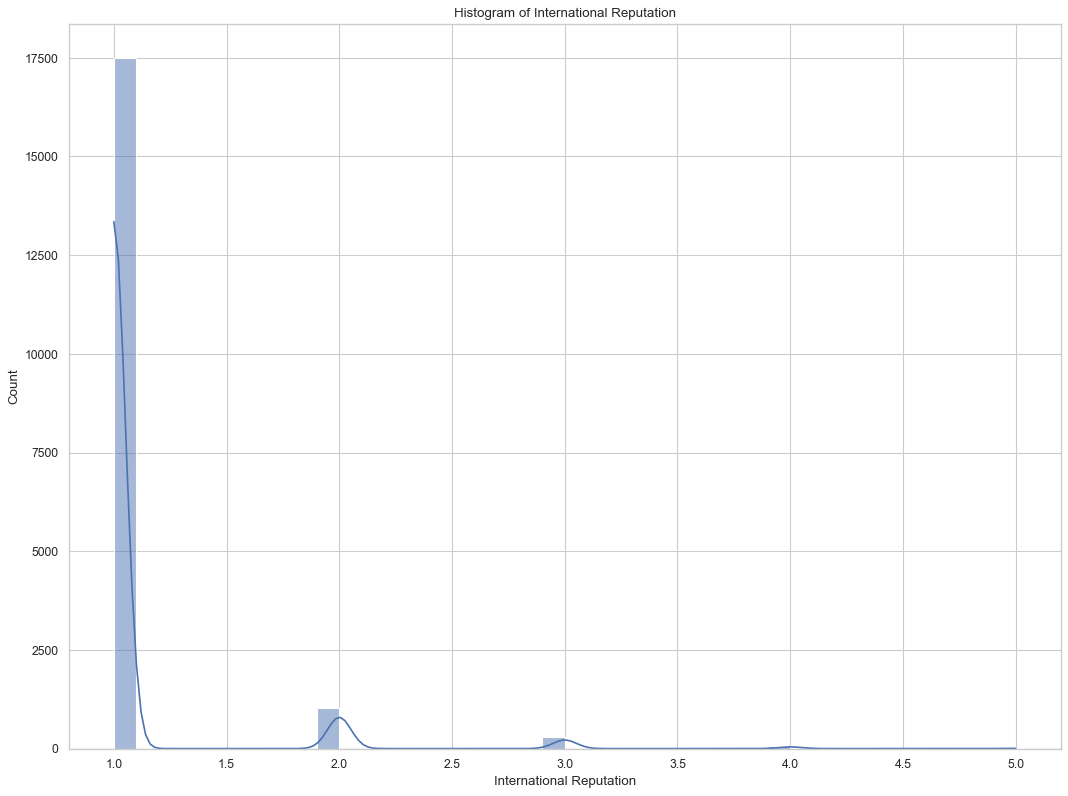

In [167]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="international_reputation", binwidth=0.1, kde=True)
ax.set(xlabel="International Reputation", ylabel="Count", title="Histogram of International Reputation")

[Text(0, 0.5, 'Work Rate'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Ranking Plot of Work Rate')]

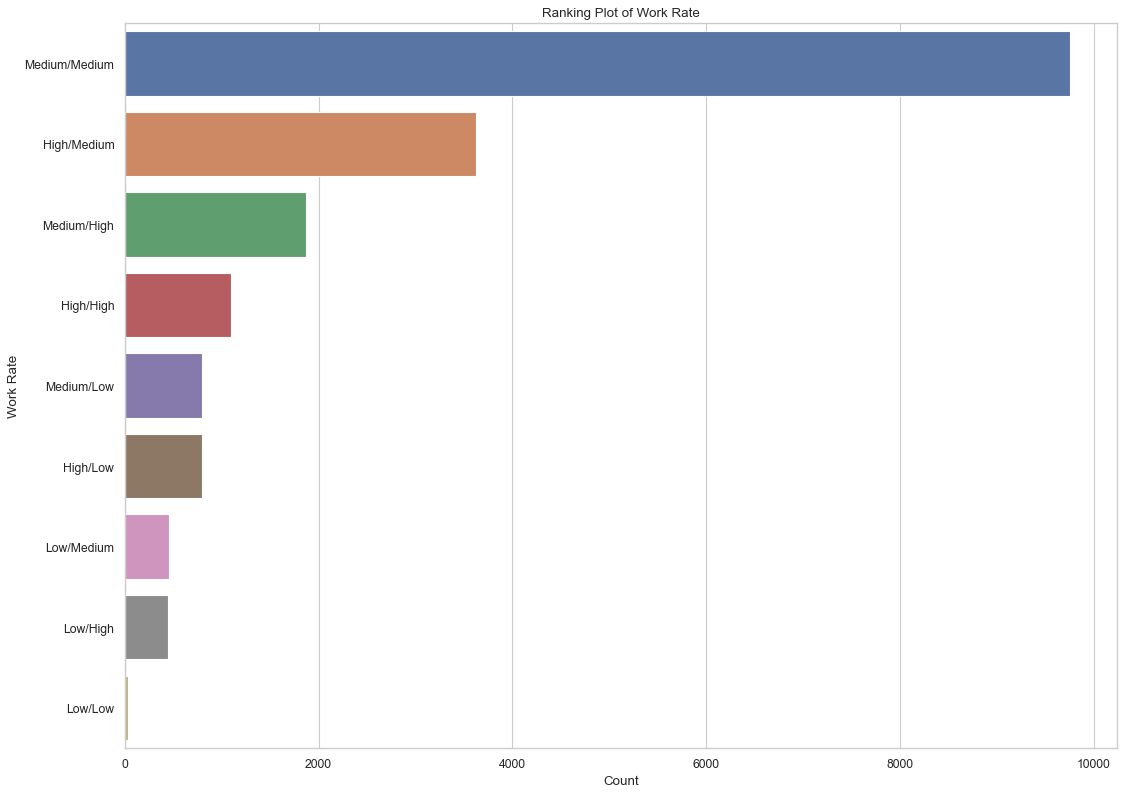

In [168]:
work_rate_df = df["work_rate"].value_counts().reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="work_rate", y="index", orient="h", data=work_rate_df)
ax.set(xlabel="Count", ylabel="Work Rate", title="Ranking Plot of Work Rate")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Body Type'),
 Text(0.5, 1.0, 'Ranking Plot of Body Type')]

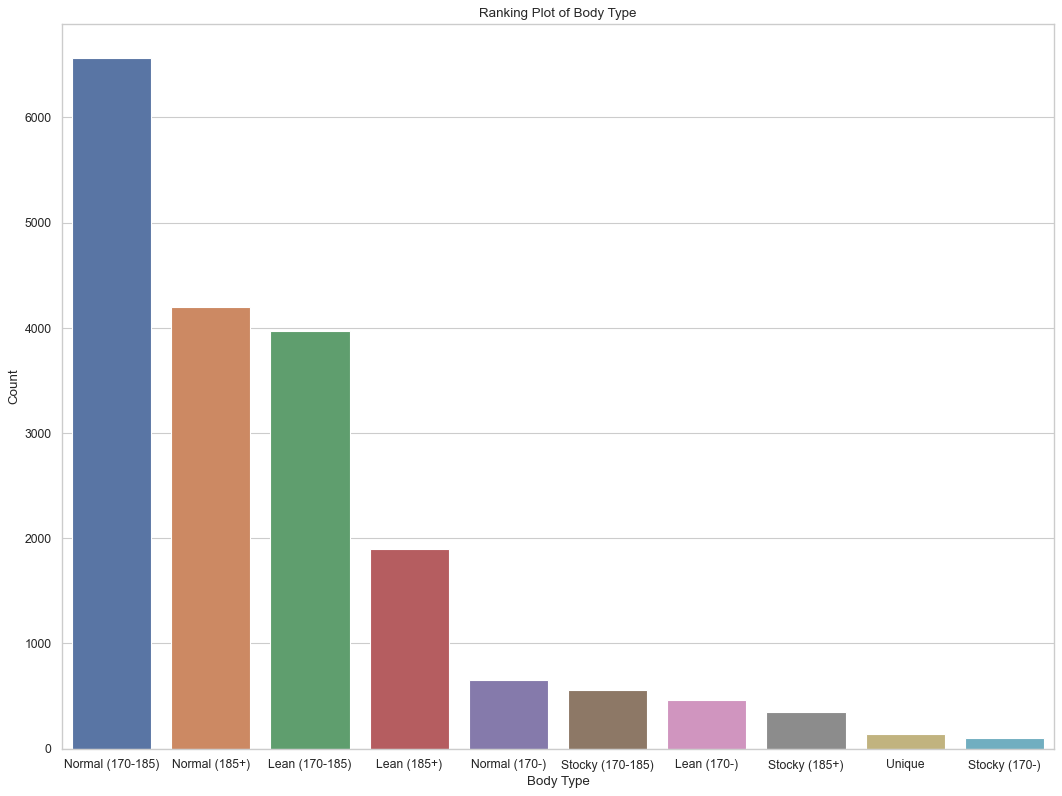

In [169]:
body_type_df = df["body_type"].value_counts().reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="index", y="body_type",  data=body_type_df)
ax.set(xlabel="Body Type", ylabel="Count", title="Ranking Plot of Body Type")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Real Face'),
 Text(0.5, 1.0, 'Ranking Plot of Real Face')]

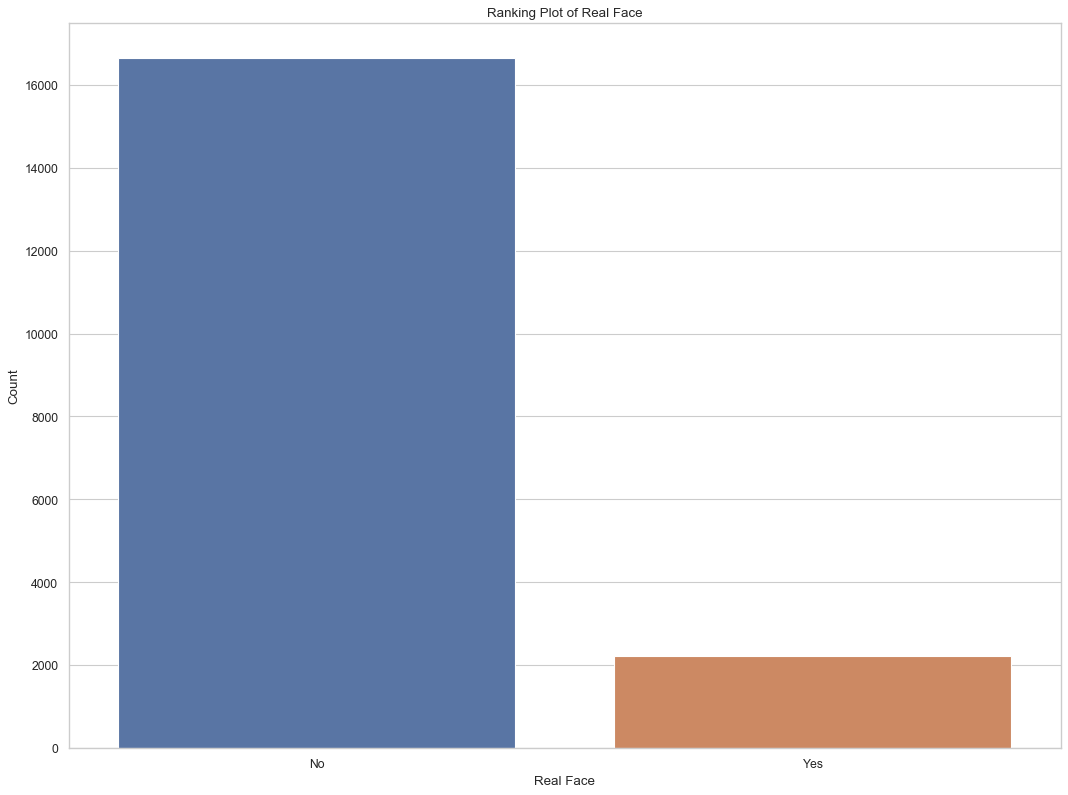

In [170]:
real_face_df = df["real_face"].value_counts().reset_index()

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x="index", y="real_face",  data=real_face_df)
ax.set(xlabel="Real Face", ylabel="Count", title="Ranking Plot of Real Face")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Release Clause Euro'),
 Text(0.5, 1.0, 'Histogram of Release Clause Euro')]

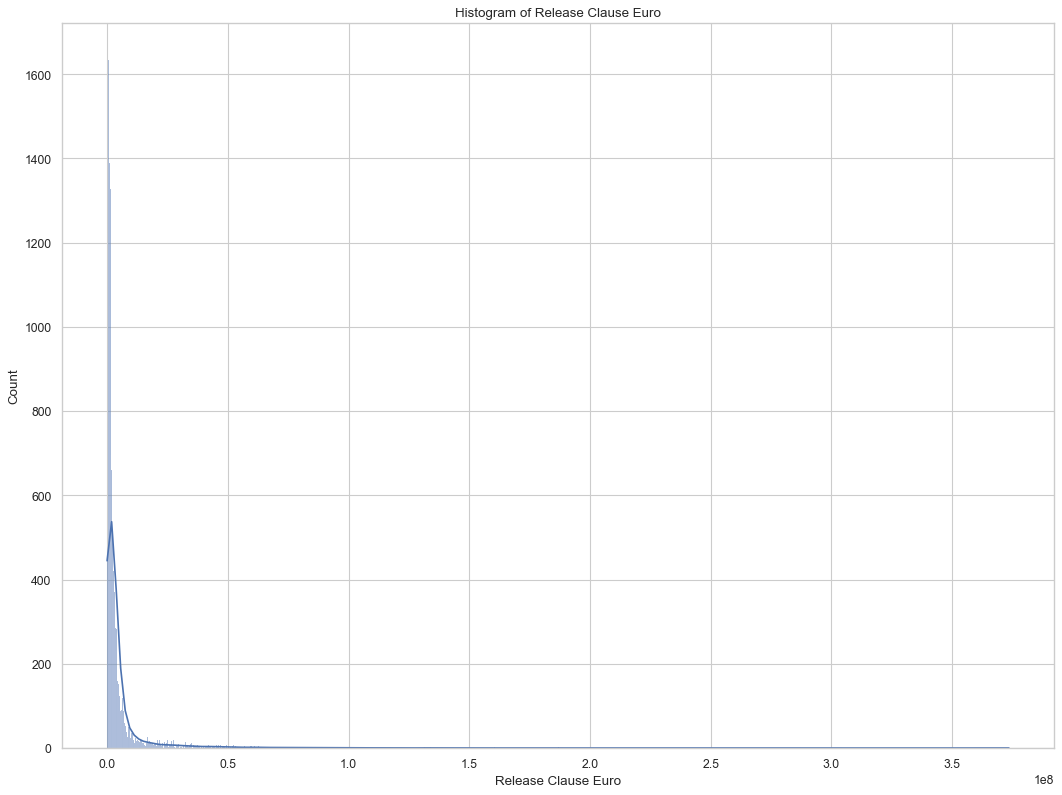

In [171]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.histplot(data=df, x="release_clause_eur", kde=True)
ax.set(xlabel="Release Clause Euro", ylabel="Count", title="Histogram of Release Clause Euro")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Release Clause Euro'),
 Text(0.5, 1.0, 'Histogram of Release Clause Euro')]

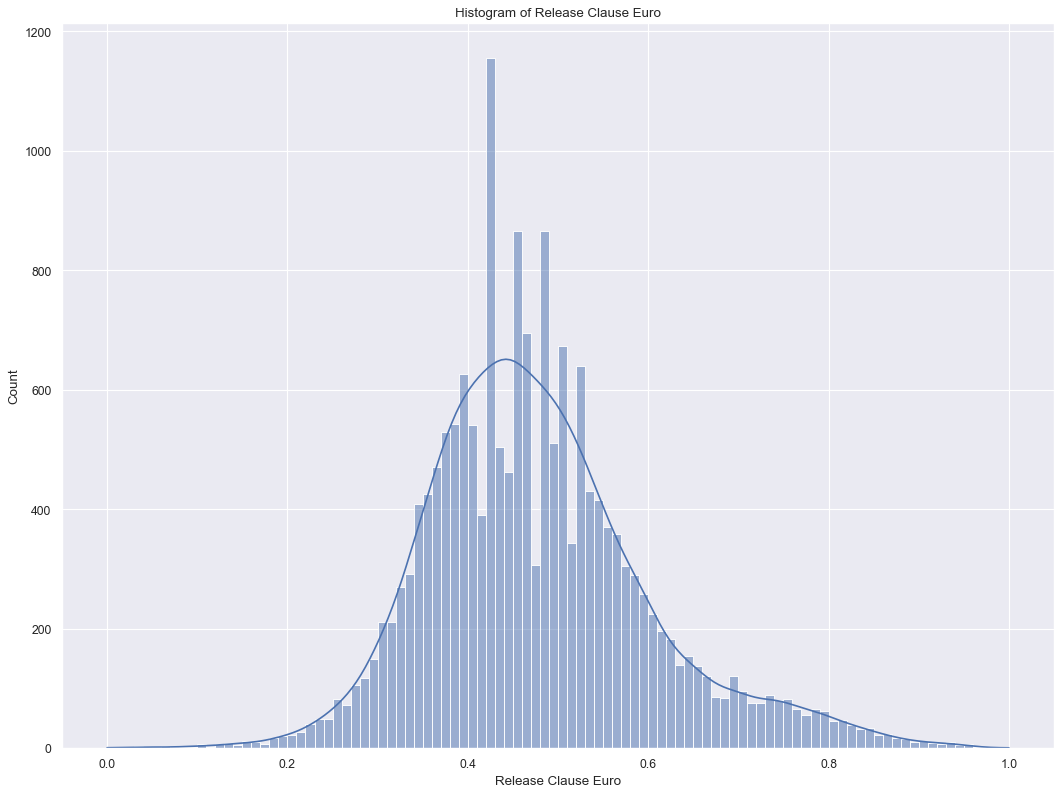

In [232]:
plt.figure(figsize=(16, 12), dpi=80)
dx = df[df["release_clause_eur"] != "None"]["release_clause_eur"].astype(float).to_frame()
ax = sns.histplot(data=dx, x="release_clause_eur", kde=True, binwidth=0.01)
ax.set(xlabel="Release Clause Euro", ylabel="Count", title="Histogram of Release Clause Euro")

[Text(0, 0.5, 'Player Tags'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Bar Plot of Player Tags')]

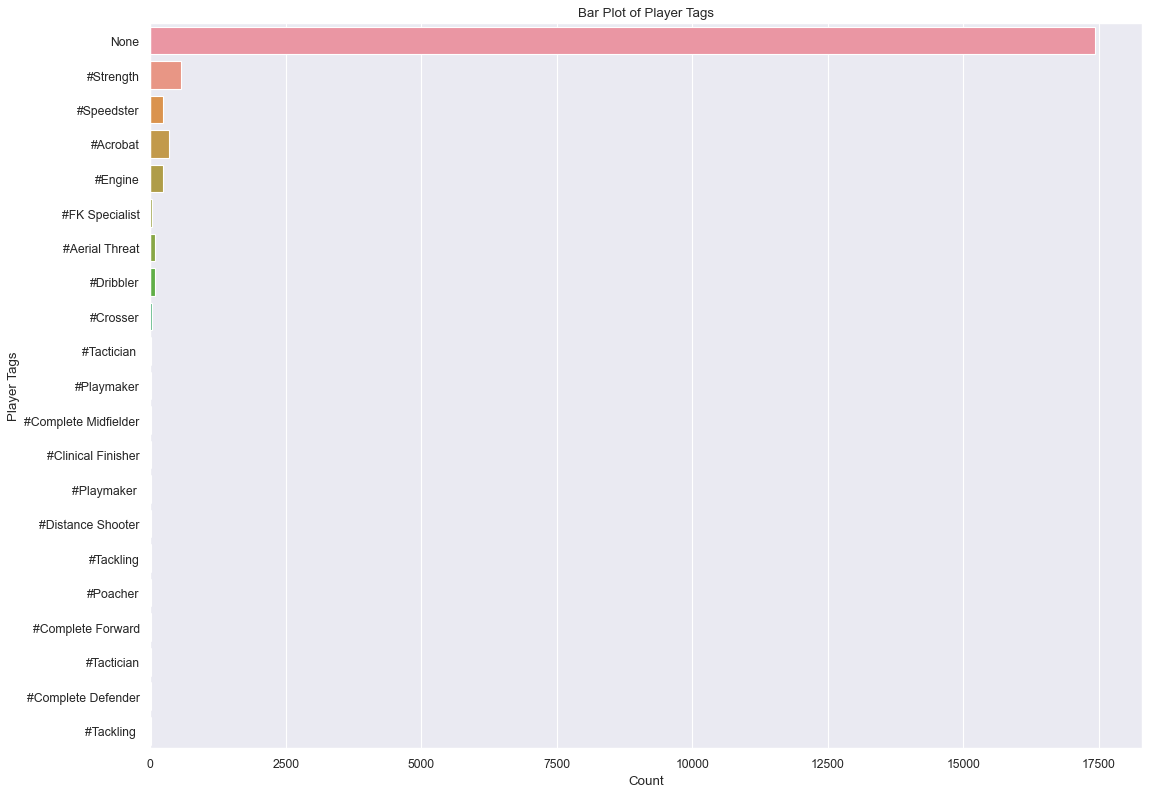

In [233]:
player_tags_dict = {}
player_tags_split = df[np.logical_not(df["player_tags"].isnull())]["player_tags"].str.split(", ").values
for tags in player_tags_split:
    for tag in tags:
        if tag in player_tags_dict:
            player_tags_dict[tag] += 1
        else:
            player_tags_dict[tag] = 1

player_position_df = pd.Series(player_tags_dict).reset_index()
player_position_df.columns = ["Index", "Count"]

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(y="Index", x="Count", orient="h", data=player_position_df)
ax.set(ylabel="Player Tags", xlabel="Count", title="Bar Plot of Player Tags")

[Text(0, 0.5, 'Player Traits'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Bar Plot of Player Traits')]

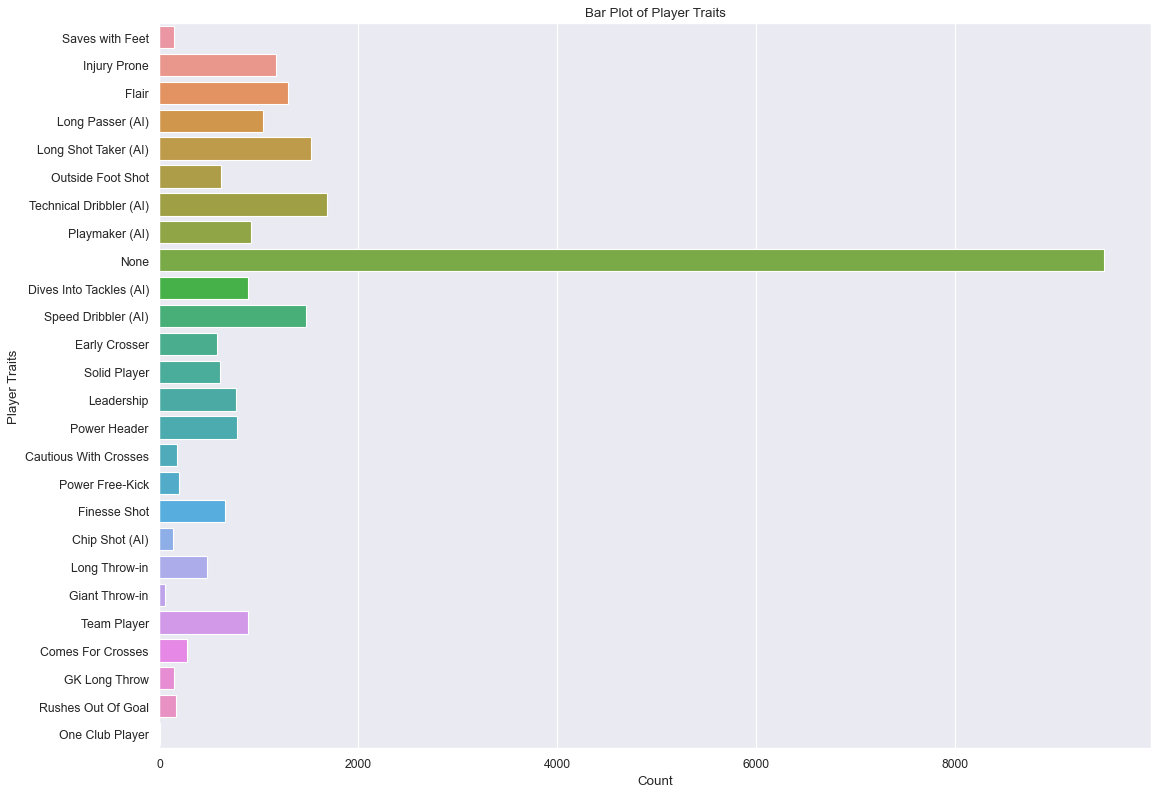

In [234]:
player_traits_dict = {}
player_traits_split = df[np.logical_not(df["player_traits"].isnull())]["player_traits"].str.split(", ").values
for traits in player_traits_split:
    for traits in traits:
        if traits in player_traits_dict:
            player_traits_dict[traits] += 1
        else:
            player_traits_dict[traits] = 1

player_position_df = pd.Series(player_traits_dict).reset_index()
player_position_df.columns = ["Index", "Count"]

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(y="Index", x="Count", orient="h", data=player_position_df)
ax.set(ylabel="Player Traits", xlabel="Count", title="Bar Plot of Player Traits")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Physic'),
 Text(0.5, 1.0, 'Histogram of Physic')]

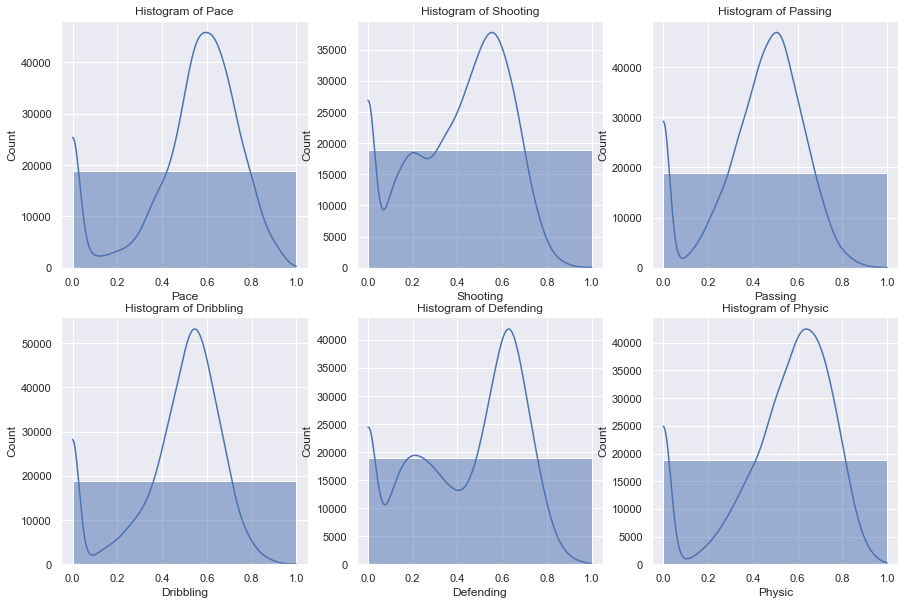

In [235]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='pace', ax=axes[0, 0], binwidth=1, kde=True)
axes[0, 0].set(xlabel="Pace", ylabel="Count", title="Histogram of Pace")

sns.histplot(data=df, x='shooting', ax=axes[0, 1], binwidth=1, kde=True)
axes[0, 1].set(xlabel="Shooting", ylabel="Count", title="Histogram of Shooting")

sns.histplot(data=df, x='passing', ax=axes[0, 2], binwidth=1, kde=True)
axes[0, 2].set(xlabel="Passing", ylabel="Count", title="Histogram of Passing")

sns.histplot(data=df, x='dribbling', ax=axes[1, 0], binwidth=1, kde=True)
axes[1, 0].set(xlabel="Dribbling", ylabel="Count", title="Histogram of Dribbling")

sns.histplot(data=df, x="defending", ax=axes[1, 1], binwidth=1, kde=True)
axes[1, 1].set(xlabel="Defending", ylabel="Count", title="Histogram of Defending")

sns.histplot(data=df, x='physic', ax=axes[1, 2], binwidth=1, kde=True)
axes[1, 2].set(xlabel="Physic", ylabel="Count", title="Histogram of Physic")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Attacking Volleys'),
 Text(0.5, 1.0, 'Histogram of Attacking Volleys')]

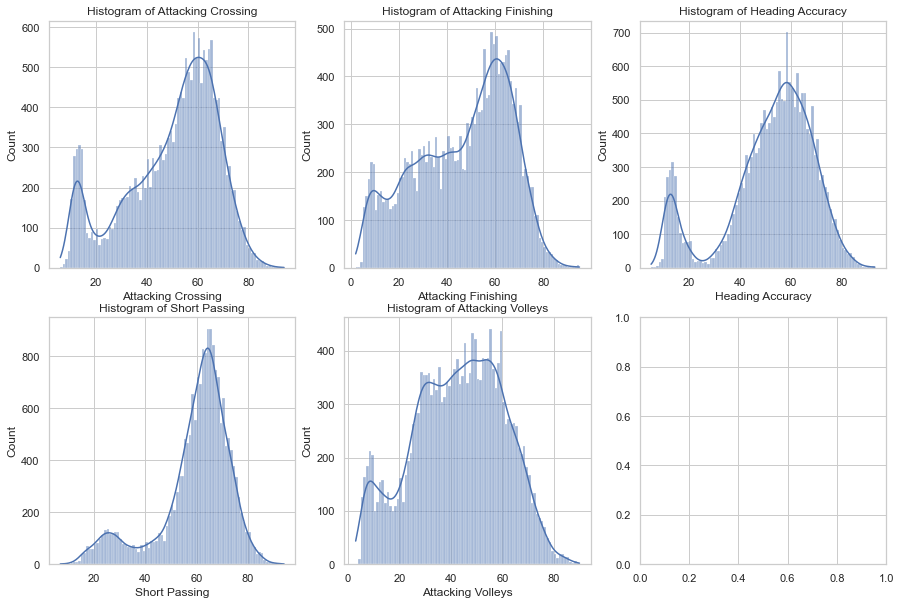

In [177]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='attacking_crossing', ax=axes[0, 0], binwidth=1, kde=True)
axes[0, 0].set(xlabel="Attacking Crossing", ylabel="Count", title="Histogram of Attacking Crossing")

sns.histplot(data=df, x='attacking_finishing', ax=axes[0, 1], binwidth=1, kde=True)
axes[0, 1].set(xlabel="Attacking Finishing", ylabel="Count", title="Histogram of Attacking Finishing")

sns.histplot(data=df, x='attacking_heading_accuracy', ax=axes[0, 2], binwidth=1, kde=True)
axes[0, 2].set(xlabel="Heading Accuracy", ylabel="Count", title="Histogram of Heading Accuracy")

sns.histplot(data=df, x='attacking_short_passing', ax=axes[1, 0], binwidth=1, kde=True)
axes[1, 0].set(xlabel="Short Passing", ylabel="Count", title="Histogram of Short Passing")

sns.histplot(data=df, x='attacking_volleys', ax=axes[1, 1], binwidth=1, kde=True)
axes[1, 1].set(xlabel="Attacking Volleys", ylabel="Count", title="Histogram of Attacking Volleys")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Ball Control'),
 Text(0.5, 1.0, 'Histogram of Ball Control')]

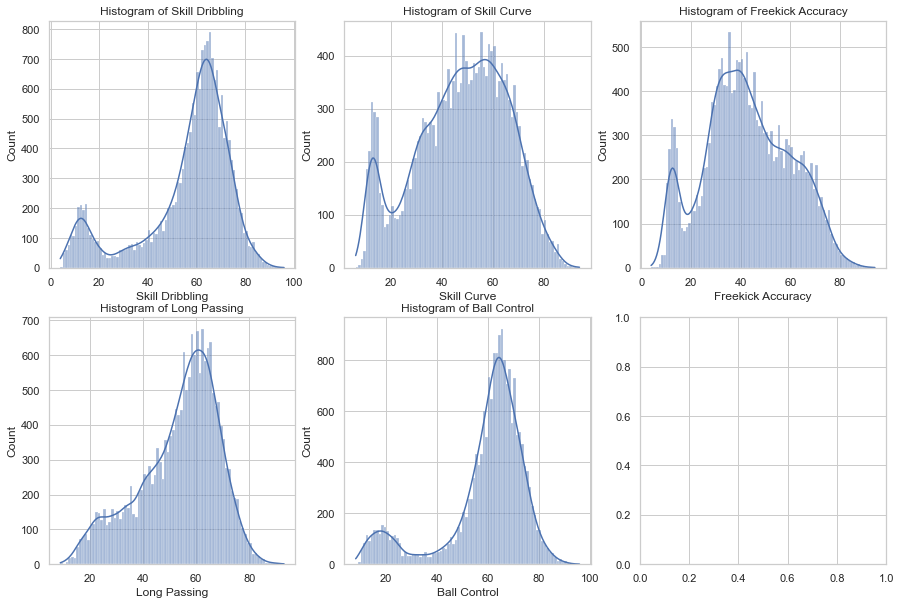

In [178]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='skill_dribbling', ax=axes[0, 0], binwidth=1, kde=True)
axes[0, 0].set(xlabel="Skill Dribbling", ylabel="Count", title="Histogram of Skill Dribbling")

sns.histplot(data=df, x='skill_curve', ax=axes[0, 1], binwidth=1, kde=True)
axes[0, 1].set(xlabel="Skill Curve", ylabel="Count", title="Histogram of Skill Curve")

sns.histplot(data=df, x='skill_fk_accuracy', ax=axes[0, 2], binwidth=1, kde=True)
axes[0, 2].set(xlabel="Freekick Accuracy", ylabel="Count", title="Histogram of Freekick Accuracy")

sns.histplot(data=df, x='skill_long_passing', ax=axes[1, 0], binwidth=1, kde=True)
axes[1, 0].set(xlabel="Long Passing", ylabel="Count", title="Histogram of Long Passing")

sns.histplot(data=df, x='skill_ball_control', ax=axes[1, 1], binwidth=1, kde=True)
axes[1, 1].set(xlabel="Ball Control", ylabel="Count", title="Histogram of Ball Control")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Balance'),
 Text(0.5, 1.0, 'Histogram of Balance')]

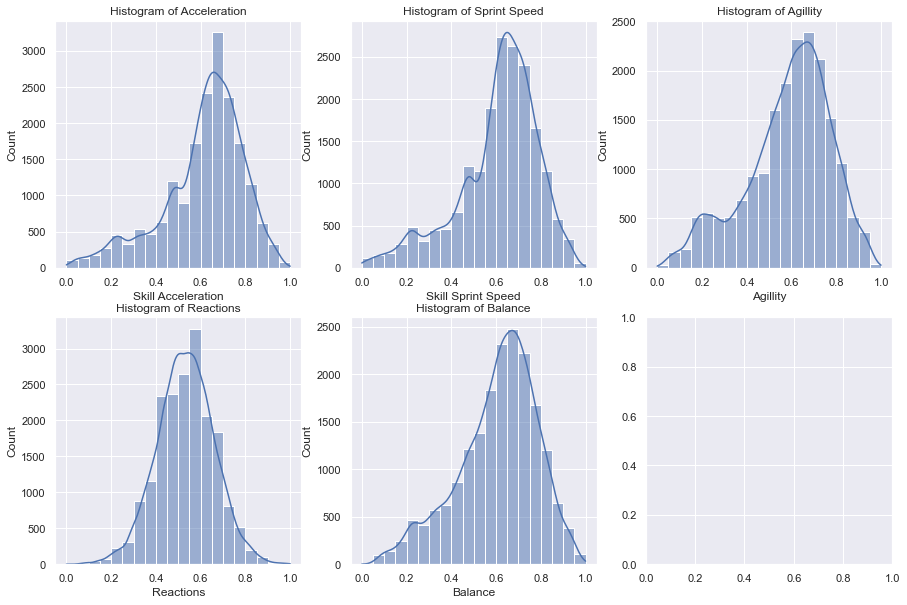

In [252]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='movement_acceleration', ax=axes[0, 0], binwidth=1, kde=True)
axes[0, 0].set(xlabel="Skill Acceleration", ylabel="Count", title="Histogram of Acceleration")

sns.histplot(data=df, x='movement_sprint_speed', ax=axes[0, 1], binwidth=1, kde=True)
axes[0, 1].set(xlabel="Skill Sprint Speed", ylabel="Count", title="Histogram of Sprint Speed")

sns.histplot(data=df, x='movement_agility', ax=axes[0, 2], binwidth=1, kde=True)
axes[0, 2].set(xlabel="Agillity", ylabel="Count", title="Histogram of Agillity")

sns.histplot(data=df, x='movement_reactions', ax=axes[1, 0], binwidth=1, kde=True)
axes[1, 0].set(xlabel="Reactions", ylabel="Count", title="Histogram of Reactions")

sns.histplot(data=df, x='movement_balance', ax=axes[1, 1], binwidth=1, kde=True)
axes[1, 1].set(xlabel="Balance", ylabel="Count", title="Histogram of Balance")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Long Shots'),
 Text(0.5, 1.0, 'Histogram of Long Shots')]

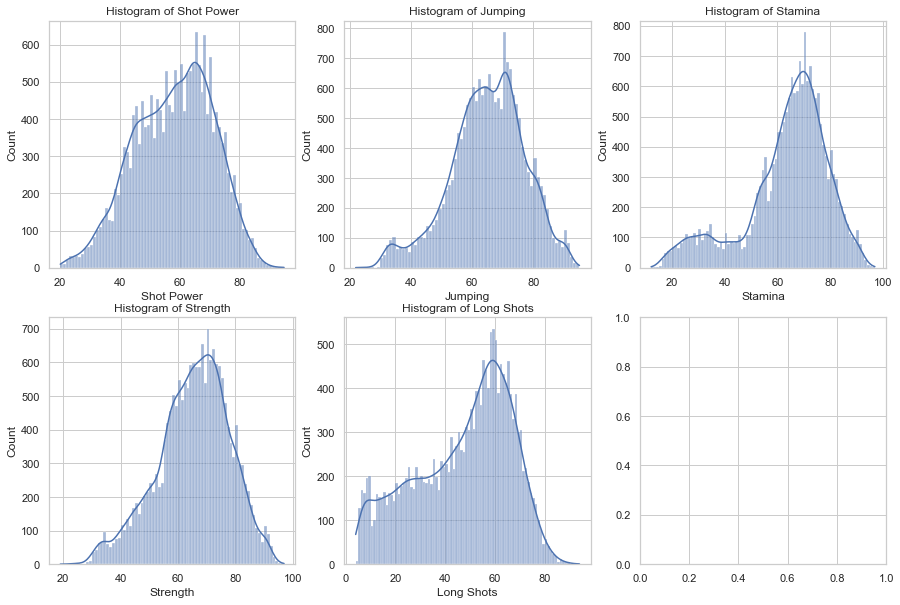

In [180]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='power_shot_power', ax=axes[0, 0], binwidth=1, kde=True)
axes[0, 0].set(xlabel="Shot Power", ylabel="Count", title="Histogram of Shot Power")

sns.histplot(data=df, x='power_jumping', ax=axes[0, 1], binwidth=1, kde=True)
axes[0, 1].set(xlabel="Jumping", ylabel="Count", title="Histogram of Jumping")

sns.histplot(data=df, x='power_stamina', ax=axes[0, 2], binwidth=1, kde=True)
axes[0, 2].set(xlabel="Stamina", ylabel="Count", title="Histogram of Stamina")

sns.histplot(data=df, x='power_strength', ax=axes[1, 0], binwidth=1, kde=True)
axes[1, 0].set(xlabel="Strength", ylabel="Count", title="Histogram of Strength")

sns.histplot(data=df, x='power_long_shots', ax=axes[1, 1], binwidth=1, kde=True)
axes[1, 1].set(xlabel="Long Shots", ylabel="Count", title="Histogram of Long Shots")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Composure'),
 Text(0.5, 1.0, 'Histogram of Composure')]

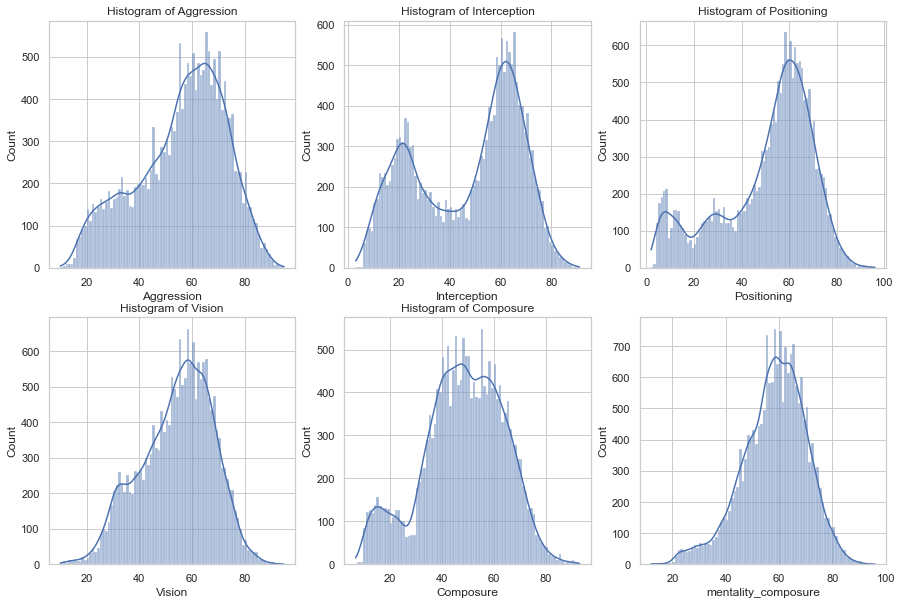

In [181]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='mentality_aggression', ax=axes[0, 0], binwidth=1, kde=True)
axes[0, 0].set(xlabel="Aggression", ylabel="Count", title="Histogram of Aggression")

sns.histplot(data=df, x='mentality_interceptions', ax=axes[0, 1], binwidth=1, kde=True)
axes[0, 1].set(xlabel="Interception", ylabel="Count", title="Histogram of Interception")

sns.histplot(data=df, x='mentality_positioning', ax=axes[0, 2], binwidth=1, kde=True)
axes[0, 2].set(xlabel="Positioning", ylabel="Count", title="Histogram of Positioning")

sns.histplot(data=df, x='mentality_vision', ax=axes[1, 0], binwidth=1, kde=True)
axes[1, 0].set(xlabel="Vision", ylabel="Count", title="Histogram of Vision")

sns.histplot(data=df, x='mentality_penalties', ax=axes[1, 1], binwidth=1, kde=True)
axes[1, 1].set(xlabel="Penalties", ylabel="Count", title="Histogram of Penalties")

sns.histplot(data=df, x='mentality_composure', ax=axes[1, 2], binwidth=1, kde=True)
axes[1, 1].set(xlabel="Composure", ylabel="Count", title="Histogram of Composure")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Sliding Tackle'),
 Text(0.5, 1.0, 'Histogram of Sliding Tackle')]

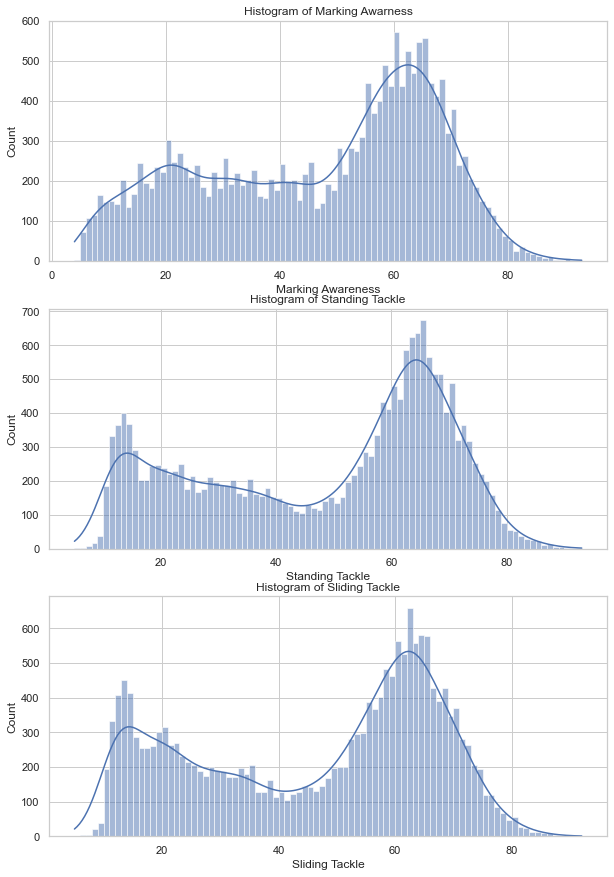

In [182]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(10, 15)

sns.histplot(data=df, x='defending_marking_awareness', ax=axes[0], binwidth=1, kde=True)
axes[0].set(xlabel="Marking Awareness", ylabel="Count", title="Histogram of Marking Awarness")

sns.histplot(data=df, x='defending_standing_tackle', ax=axes[1], binwidth=1, kde=True)
axes[1].set(xlabel="Standing Tackle", ylabel="Count", title="Histogram of Standing Tackle")

sns.histplot(data=df, x='defending_sliding_tackle', ax=axes[2], binwidth=1, kde=True)
axes[2].set(xlabel="Sliding Tackle", ylabel="Count", title="Histogram of Sliding Tackle")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Speed'),
 Text(0.5, 1.0, 'Histogram of Speed')]

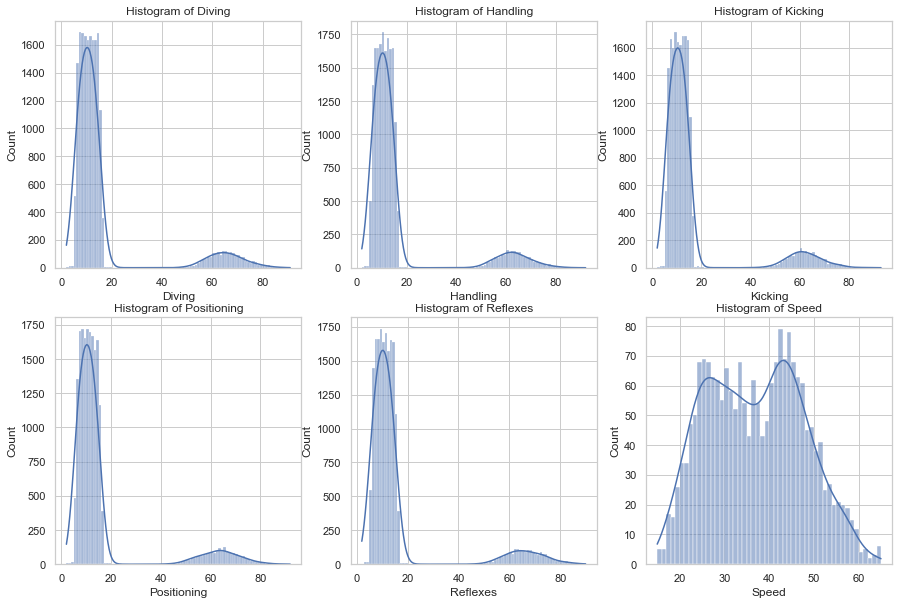

In [183]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='goalkeeping_diving', ax=axes[0, 0], binwidth=1, kde=True)
axes[0, 0].set(xlabel="Diving", ylabel="Count", title="Histogram of Diving")

sns.histplot(data=df, x='goalkeeping_handling', ax=axes[0, 1], binwidth=1, kde=True)
axes[0, 1].set(xlabel="Handling", ylabel="Count", title="Histogram of Handling")

sns.histplot(data=df, x='goalkeeping_kicking', ax=axes[0, 2], binwidth=1, kde=True)
axes[0, 2].set(xlabel="Kicking", ylabel="Count", title="Histogram of Kicking")

sns.histplot(data=df, x='goalkeeping_positioning', ax=axes[1, 0], binwidth=1, kde=True)
axes[1, 0].set(xlabel="Positioning", ylabel="Count", title="Histogram of Positioning")

sns.histplot(data=df, x='goalkeeping_reflexes', ax=axes[1, 1], binwidth=1, kde=True)
axes[1, 1].set(xlabel="Reflexes", ylabel="Count", title="Histogram of Reflexes")

sns.histplot(data=df, x='goalkeeping_speed', ax=axes[1, 2], binwidth=1, kde=True)
axes[1, 2].set(xlabel="Speed", ylabel="Count", title="Histogram of Speed")

## Trim Trailling Whitespaces

In [184]:
string_columns = df.select_dtypes(include="object").columns
for column in string_columns:
    df[column].str.strip()

## Remove Wrong Format Data

In [185]:
# TODO: check jersey number with 3023 contract
# TODO: Check duplicate names
# TODO: Fix club position CF, 74, joe, mmd
# TODO: Fix preferred foot r, l

In [186]:
contract_incorrect_index = df[df["club_contract_valid_until"] == 3023].index

df.iloc[contract_incorrect_index, df.columns.get_loc("club_contract_valid_until")] = 2023

Change contract valid until of 3023 into 2023

In [187]:
long_name_duplicate = df["long_name"].value_counts()[df["long_name"].value_counts() > 1].index.to_list()

len(df[df["long_name"].isin(long_name_duplicate)]["dob"].unique())


34

Similiar long name are justified because different dob

In [188]:
club_position_incorrect = [74, "MMD", "JOKE"]
club_position_wrong_index = df[df["club_position"].isin(club_position_incorrect)].index
df.iloc[club_position_wrong_index, df.columns.get_loc("club_position")] = df[df["club_position"].isin(club_position_incorrect)]["player_positions"].str.split(", ", expand=True)[0]

Wrong club position is change into player position

In [189]:
df["preferred_foot"] = df["preferred_foot"].replace(["R", "L"], ["Right", "Left"])

Replace R and L with Right and Left respectively

## Transform Data

In [190]:
# Age: Scale
# Attacking: GMM
# Club Contract Valid Until: 
# Defense: GMM
# Goalkeeping: GMM
# Weight and Height: Scale
# Mentality: GMM
# Movement: Scale
# Overall: Potential
# Stats: GMM and Scale
# Power: GMM and Scale
# Release Clause Eur: Scale
# Skill: GMM
# Value and Wage: Scale
# Split work Rate

scaler = MinMaxScaler()
gmm2 = GaussianMixture(n_components=2, random_state=42)
gmm3 = GaussianMixture(n_components=3, random_state=42)
gmm4 = GaussianMixture(n_components=4, random_state=42)

Min max scale age into age_scaled

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Attacking Volleys'),
 Text(0.5, 1.0, 'Histogram of Attacking Volleys')]

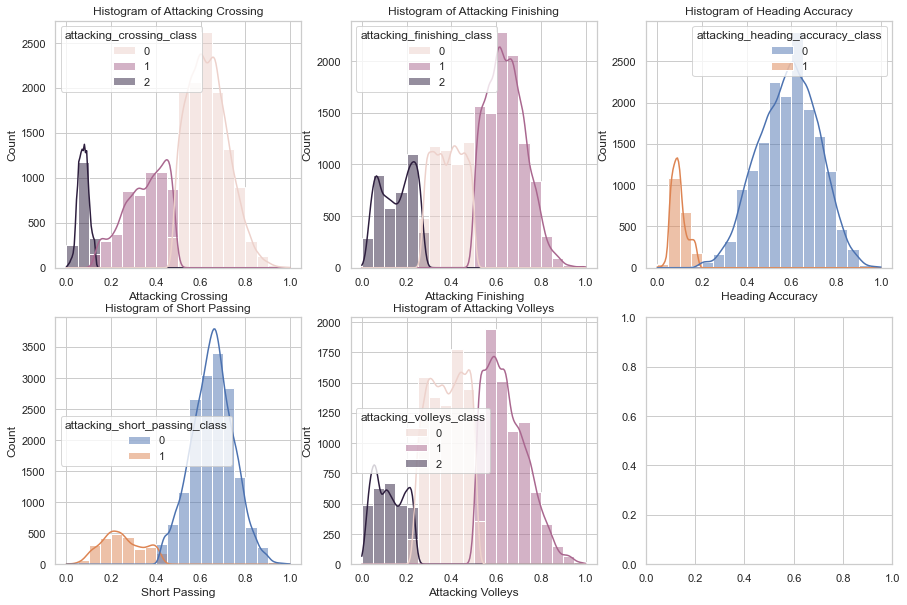

In [191]:
df["attacking_crossing_class"] = gmm3.fit_predict(df["attacking_crossing"].values.reshape(-1, 1))
df["attacking_heading_accuracy_class"] = gmm2.fit_predict(df["attacking_heading_accuracy"].values.reshape(-1, 1))
df["attacking_short_passing_class"] = gmm2.fit_predict(df["attacking_short_passing"].values.reshape(-1, 1))
df["attacking_volleys_class"] = gmm3.fit_predict(df["attacking_volleys"].values.reshape(-1, 1))
df["attacking_finishing_class"] = gmm3.fit_predict(df["attacking_finishing"].values.reshape(-1, 1))

df["attacking_crossing"] = scaler.fit_transform(df["attacking_crossing"].to_numpy().reshape(-1, 1))
df["attacking_heading_accuracy"] = scaler.fit_transform(df["attacking_heading_accuracy"].to_numpy().reshape(-1, 1))
df["attacking_short_passing"] = scaler.fit_transform(df["attacking_short_passing"].to_numpy().reshape(-1, 1))
df["attacking_volleys"] = scaler.fit_transform(df["attacking_volleys"].to_numpy().reshape(-1, 1))
df["attacking_finishing"] = scaler.fit_transform(df["attacking_finishing"].to_numpy().reshape(-1, 1))


fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='attacking_crossing', ax=axes[0, 0], binwidth=0.05, kde=True, hue="attacking_crossing_class")
axes[0, 0].set(xlabel="Attacking Crossing", ylabel="Count", title="Histogram of Attacking Crossing")

sns.histplot(data=df, x='attacking_finishing', ax=axes[0, 1], binwidth=0.05, kde=True, hue="attacking_finishing_class")
axes[0, 1].set(xlabel="Attacking Finishing", ylabel="Count", title="Histogram of Attacking Finishing")

sns.histplot(data=df, x='attacking_heading_accuracy', ax=axes[0, 2], binwidth=0.05, kde=True, hue="attacking_heading_accuracy_class")
axes[0, 2].set(xlabel="Heading Accuracy", ylabel="Count", title="Histogram of Heading Accuracy")

sns.histplot(data=df, x='attacking_short_passing', ax=axes[1, 0], binwidth=0.05, kde=True, hue="attacking_short_passing_class")
axes[1, 0].set(xlabel="Short Passing", ylabel="Count", title="Histogram of Short Passing")

sns.histplot(data=df, x='attacking_volleys', ax=axes[1, 1], binwidth=0.05, kde=True, hue="attacking_volleys_class")
axes[1, 1].set(xlabel="Attacking Volleys", ylabel="Count", title="Histogram of Attacking Volleys")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Sliding Tackle'),
 Text(0.5, 1.0, 'Histogram of Sliding Tackle')]

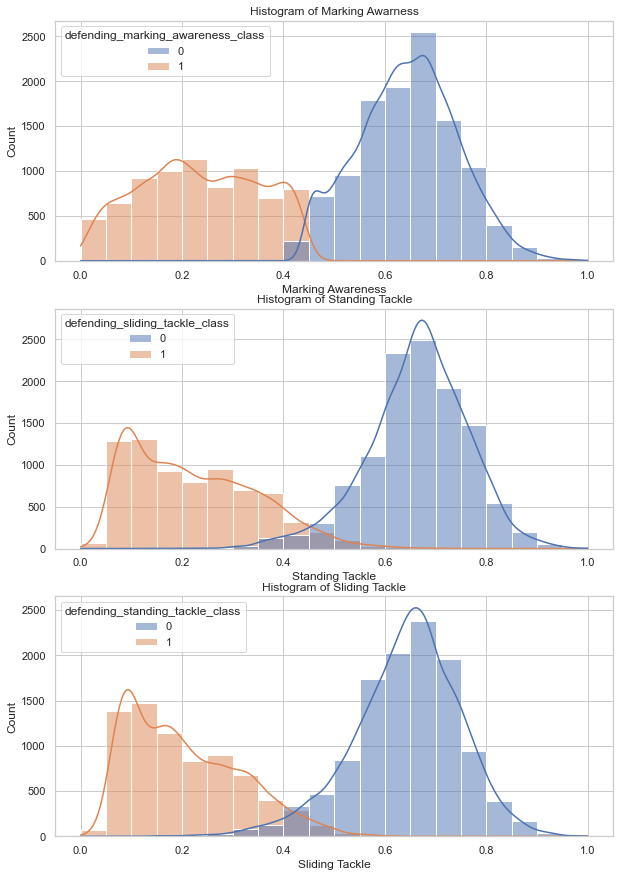

In [192]:
df["defending_marking_awareness_class"] = gmm2.fit_predict(df["defending_marking_awareness"].values.reshape(-1, 1))
df["defending_sliding_tackle_class"] = gmm2.fit_predict(df["defending_sliding_tackle"].values.reshape(-1, 1))
df["defending_standing_tackle_class"] = gmm2.fit_predict(df["defending_standing_tackle"].values.reshape(-1, 1))

df["defending_marking_awareness"] = scaler.fit_transform(df["defending_marking_awareness"].to_numpy().reshape(-1, 1))
df["defending_sliding_tackle"] = scaler.fit_transform(df["defending_sliding_tackle"].to_numpy().reshape(-1, 1))
df["defending_standing_tackle"] = scaler.fit_transform(df["defending_standing_tackle"].to_numpy().reshape(-1, 1))

fig, axes = plt.subplots(3, 1)
fig.set_size_inches(10, 15)

sns.histplot(data=df, x='defending_marking_awareness', ax=axes[0], binwidth=0.05, kde=True, hue="defending_marking_awareness_class")
axes[0].set(xlabel="Marking Awareness", ylabel="Count", title="Histogram of Marking Awarness")

sns.histplot(data=df, x='defending_standing_tackle', ax=axes[1], binwidth=0.05, kde=True, hue="defending_sliding_tackle_class")
axes[1].set(xlabel="Standing Tackle", ylabel="Count", title="Histogram of Standing Tackle")

sns.histplot(data=df, x='defending_sliding_tackle', ax=axes[2], binwidth=0.05, kde=True, hue="defending_standing_tackle_class")
axes[2].set(xlabel="Sliding Tackle", ylabel="Count", title="Histogram of Sliding Tackle")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Speed'),
 Text(0.5, 1.0, 'Histogram of Speed')]

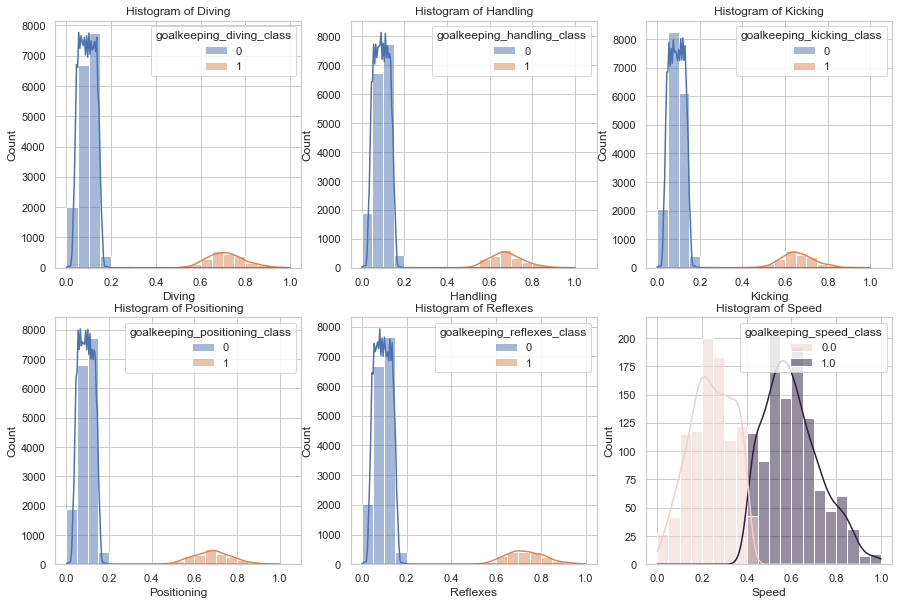

In [193]:
df["goalkeeping_diving_class"] = gmm2.fit_predict(df["goalkeeping_diving"].values.reshape(-1, 1))
df["goalkeeping_handling_class"] = gmm2.fit_predict(df["goalkeeping_handling"].values.reshape(-1, 1))
df["goalkeeping_kicking_class"] = gmm2.fit_predict(df["goalkeeping_kicking"].values.reshape(-1, 1))
df["goalkeeping_positioning_class"] = gmm2.fit_predict(df["goalkeeping_positioning"].values.reshape(-1, 1))

df["goalkeeping_speed_class"] = np.nan

df.iloc[df["goalkeeping_speed"].dropna().index, df.columns.get_loc("goalkeeping_speed_class")] = gmm2.fit_predict(df["goalkeeping_speed"].dropna().values.reshape(-1, 1))

df["goalkeeping_reflexes_class"] = gmm2.fit_predict(df["goalkeeping_reflexes"].values.reshape(-1, 1))


df["goalkeeping_diving"] = scaler.fit_transform(df["goalkeeping_diving"].to_numpy().reshape(-1, 1))
df["goalkeeping_handling"] = scaler.fit_transform(df["goalkeeping_handling"].to_numpy().reshape(-1, 1))
df["goalkeeping_kicking"] = scaler.fit_transform(df["goalkeeping_kicking"].to_numpy().reshape(-1, 1))
df["goalkeeping_positioning"] = scaler.fit_transform(df["goalkeeping_positioning"].to_numpy().reshape(-1, 1))
df["goalkeeping_reflexes"] = scaler.fit_transform(df["goalkeeping_reflexes"].to_numpy().reshape(-1, 1))
df["goalkeeping_speed"] = scaler.fit_transform(df["goalkeeping_speed"].to_numpy().reshape(-1, 1))

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='goalkeeping_diving', ax=axes[0, 0], binwidth=0.05, kde=True, hue="goalkeeping_diving_class")
axes[0, 0].set(xlabel="Diving", ylabel="Count", title="Histogram of Diving")

sns.histplot(data=df, x='goalkeeping_handling', ax=axes[0, 1], binwidth=0.05, kde=True, hue="goalkeeping_handling_class")
axes[0, 1].set(xlabel="Handling", ylabel="Count", title="Histogram of Handling")

sns.histplot(data=df, x='goalkeeping_kicking', ax=axes[0, 2], binwidth=0.05, kde=True, hue="goalkeeping_kicking_class")
axes[0, 2].set(xlabel="Kicking", ylabel="Count", title="Histogram of Kicking")

sns.histplot(data=df, x='goalkeeping_positioning', ax=axes[1, 0], binwidth=0.05, kde=True, hue="goalkeeping_positioning_class")
axes[1, 0].set(xlabel="Positioning", ylabel="Count", title="Histogram of Positioning")

sns.histplot(data=df, x='goalkeeping_reflexes', ax=axes[1, 1], binwidth=0.05, kde=True, hue="goalkeeping_reflexes_class")
axes[1, 1].set(xlabel="Reflexes", ylabel="Count", title="Histogram of Reflexes")

sns.histplot(data=df, x='goalkeeping_speed', ax=axes[1, 2], binwidth=0.05, kde=True, hue="goalkeeping_speed_class")
axes[1, 2].set(xlabel="Speed", ylabel="Count", title="Histogram of Speed")

In [194]:
df["height_cm"] = scaler.fit_transform(df["height_cm"].to_numpy().reshape(-1, 1))
df["weight_kg"] = scaler.fit_transform(df["weight_kg"].to_numpy().reshape(-1, 1))

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Composure'),
 Text(0.5, 1.0, 'Histogram of Composure')]

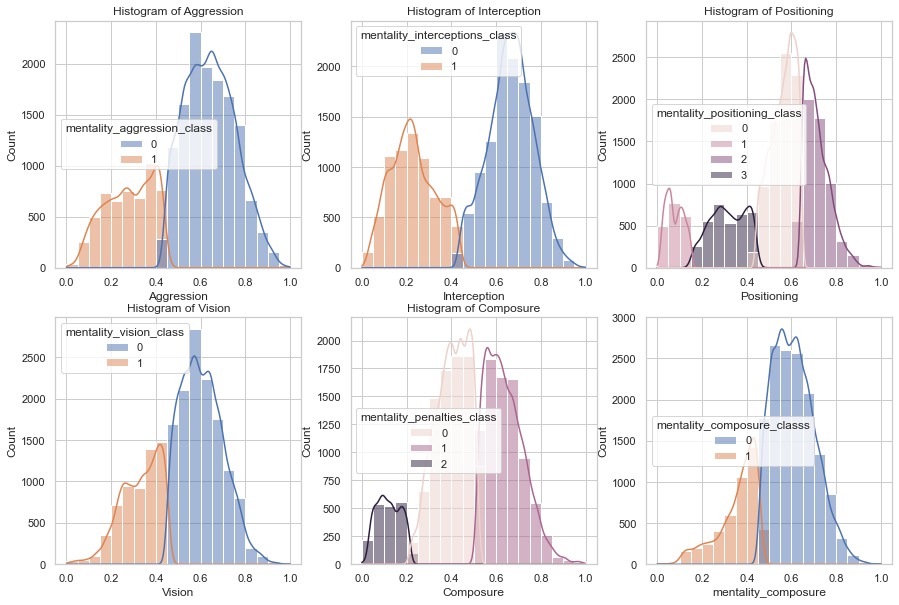

In [195]:
df["mentality_aggression_class"] = gmm2.fit_predict(df["mentality_aggression"].values.reshape(-1, 1))
df["mentality_interceptions_class"] = gmm2.fit_predict(df["mentality_interceptions"].values.reshape(-1, 1))
df["mentality_positioning_class"] = gmm4.fit_predict(df["mentality_positioning"].values.reshape(-1, 1))
df["mentality_vision_class"] = gmm2.fit_predict(df["mentality_vision"].values.reshape(-1, 1))
df["mentality_penalties_class"] = gmm3.fit_predict(df["mentality_penalties"].values.reshape(-1, 1))
df["mentality_composure_classs"] = gmm2.fit_predict(df["mentality_composure"].values.reshape(-1, 1))

df["mentality_aggression"] = scaler.fit_transform(df["mentality_aggression"].to_numpy().reshape(-1, 1))
df["mentality_composure"] = scaler.fit_transform(df["mentality_composure"].to_numpy().reshape(-1, 1))
df["mentality_interceptions"] = scaler.fit_transform(df["mentality_interceptions"].to_numpy().reshape(-1, 1))
df["mentality_penalties"] = scaler.fit_transform(df["mentality_penalties"].to_numpy().reshape(-1, 1))
df["mentality_positioning"] = scaler.fit_transform(df["mentality_positioning"].to_numpy().reshape(-1, 1))
df["mentality_vision"] = scaler.fit_transform(df["mentality_vision"].to_numpy().reshape(-1, 1))


fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='mentality_aggression', ax=axes[0, 0], binwidth=0.05, kde=True, hue="mentality_aggression_class")
axes[0, 0].set(xlabel="Aggression", ylabel="Count", title="Histogram of Aggression")

sns.histplot(data=df, x='mentality_interceptions', ax=axes[0, 1], binwidth=0.05, kde=True, hue="mentality_interceptions_class")
axes[0, 1].set(xlabel="Interception", ylabel="Count", title="Histogram of Interception")

sns.histplot(data=df, x='mentality_positioning', ax=axes[0, 2], binwidth=0.05, kde=True, hue="mentality_positioning_class")
axes[0, 2].set(xlabel="Positioning", ylabel="Count", title="Histogram of Positioning")

sns.histplot(data=df, x='mentality_vision', ax=axes[1, 0], binwidth=0.05, kde=True, hue="mentality_vision_class")
axes[1, 0].set(xlabel="Vision", ylabel="Count", title="Histogram of Vision")

sns.histplot(data=df, x='mentality_penalties', ax=axes[1, 1], binwidth=0.05, kde=True, hue="mentality_penalties_class")
axes[1, 1].set(xlabel="Penalties", ylabel="Count", title="Histogram of Penalties")

sns.histplot(data=df, x='mentality_composure', ax=axes[1, 2], binwidth=0.05, kde=True, hue="mentality_composure_classs")
axes[1, 1].set(xlabel="Composure", ylabel="Count", title="Histogram of Composure")

In [196]:
df["movement_acceleration"] = scaler.fit_transform(df["movement_acceleration"].to_numpy().reshape(-1, 1))
df["movement_agility"] = scaler.fit_transform(df["movement_agility"].to_numpy().reshape(-1, 1))
df["movement_balance"] = scaler.fit_transform(df["movement_balance"].to_numpy().reshape(-1, 1))
df["movement_reactions"] = scaler.fit_transform(df["movement_reactions"].to_numpy().reshape(-1, 1))
df["movement_sprint_speed"] = scaler.fit_transform(df["movement_sprint_speed"].to_numpy().reshape(-1, 1))

In [197]:
df["overall"] = scaler.fit_transform(df["overall"].to_numpy().reshape(-1, 1))
df["potential"] = scaler.fit_transform(df["potential"].to_numpy().reshape(-1, 1))

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Physic'),
 Text(0.5, 1.0, 'Histogram of Physic')]

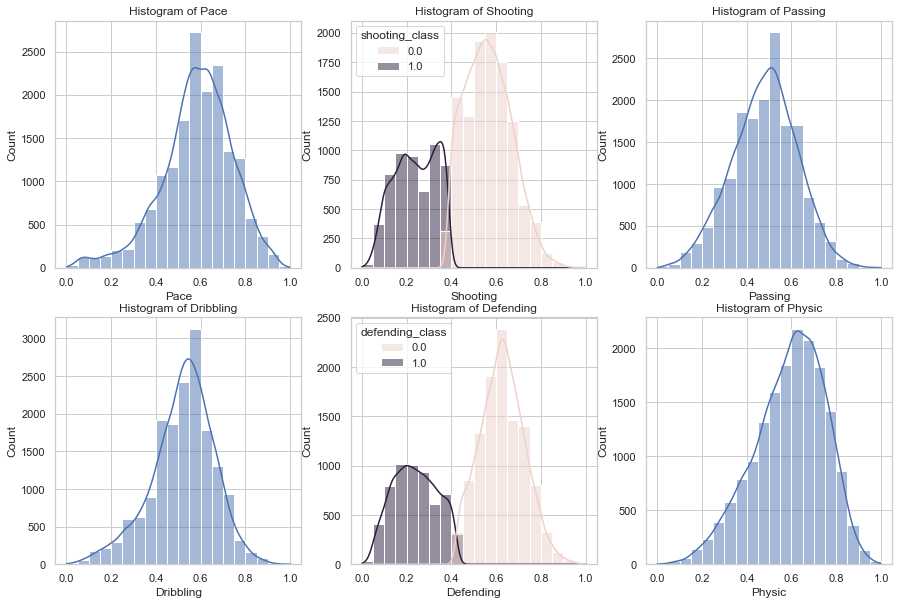

In [198]:
df["pace"] = scaler.fit_transform(df["pace"].to_numpy().reshape(-1, 1))

df["shooting_class"] = np.nan
df.iloc[df["shooting"].dropna().index, df.columns.get_loc("shooting_class")] = gmm2.fit_predict(df["shooting"].dropna().values.reshape(-1, 1))
df["shooting"] = scaler.fit_transform(df["shooting"].to_numpy().reshape(-1, 1))

df["passing"] = scaler.fit_transform(df["passing"].to_numpy().reshape(-1, 1))
df["dribbling"] = scaler.fit_transform(df["dribbling"].to_numpy().reshape(-1, 1))

df["defending_class"] = np.nan
df.iloc[df["defending"].dropna().index, df.columns.get_loc("defending_class")] = gmm2.fit_predict(df["defending"].dropna().values.reshape(-1, 1))
df["defending"] = scaler.fit_transform(df["defending"].to_numpy().reshape(-1, 1))

df["physic"] = scaler.fit_transform(df["physic"].to_numpy().reshape(-1, 1))


fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='pace', ax=axes[0, 0], binwidth=0.05, kde=True)
axes[0, 0].set(xlabel="Pace", ylabel="Count", title="Histogram of Pace")

sns.histplot(data=df, x='shooting', ax=axes[0, 1], binwidth=0.05, kde=True, hue="shooting_class")
axes[0, 1].set(xlabel="Shooting", ylabel="Count", title="Histogram of Shooting")

sns.histplot(data=df, x='passing', ax=axes[0, 2], binwidth=0.05, kde=True)
axes[0, 2].set(xlabel="Passing", ylabel="Count", title="Histogram of Passing")

sns.histplot(data=df, x='dribbling', ax=axes[1, 0], binwidth=0.05, kde=True)
axes[1, 0].set(xlabel="Dribbling", ylabel="Count", title="Histogram of Dribbling")

sns.histplot(data=df, x="defending", ax=axes[1, 1], binwidth=0.05, kde=True, hue="defending_class")
axes[1, 1].set(xlabel="Defending", ylabel="Count", title="Histogram of Defending")

sns.histplot(data=df, x='physic', ax=axes[1, 2], binwidth=0.05, kde=True)
axes[1, 2].set(xlabel="Physic", ylabel="Count", title="Histogram of Physic")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Long Shots'),
 Text(0.5, 1.0, 'Histogram of Long Shots')]

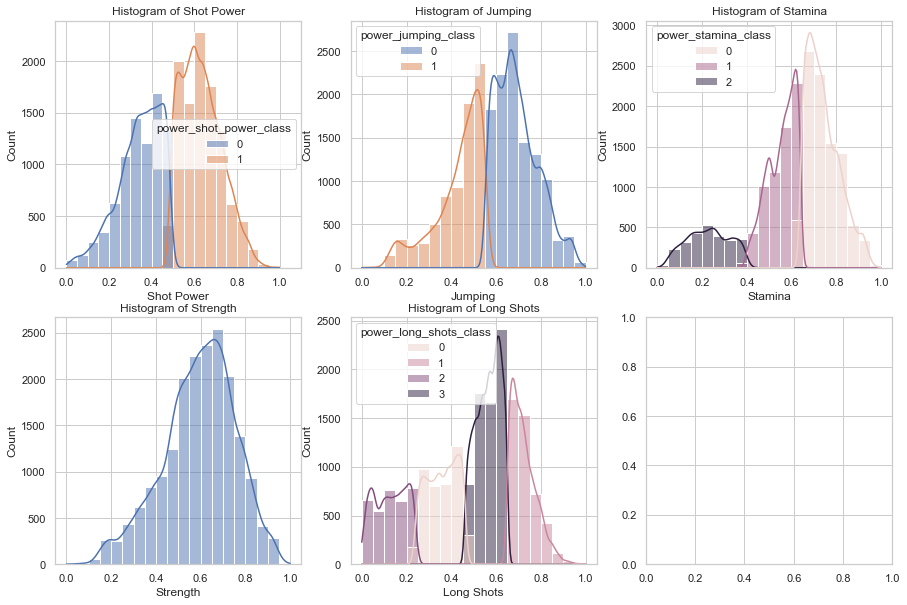

In [199]:
df["power_shot_power_class"] = gmm2.fit_predict(df["power_shot_power"].values.reshape(-1, 1))
df["power_jumping_class"] = gmm2.fit_predict(df["power_jumping"].values.reshape(-1, 1))
df["power_stamina_class"] = gmm3.fit_predict(df["power_stamina"].values.reshape(-1, 1))
df["power_long_shots_class"] = gmm4.fit_predict(df["power_long_shots"].values.reshape(-1, 1))

df["power_shot_power"] = scaler.fit_transform(df["power_shot_power"].to_numpy().reshape(-1, 1))
df["power_jumping"] = scaler.fit_transform(df["power_jumping"].to_numpy().reshape(-1, 1))
df["power_stamina"] = scaler.fit_transform(df["power_stamina"].to_numpy().reshape(-1, 1))
df["power_strength"] = scaler.fit_transform(df["power_strength"].to_numpy().reshape(-1, 1))
df["power_long_shots"] = scaler.fit_transform(df["power_long_shots"].to_numpy().reshape(-1, 1))

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='power_shot_power', ax=axes[0, 0], binwidth=0.05, kde=True, hue="power_shot_power_class")
axes[0, 0].set(xlabel="Shot Power", ylabel="Count", title="Histogram of Shot Power")

sns.histplot(data=df, x='power_jumping', ax=axes[0, 1], binwidth=0.05, kde=True, hue="power_jumping_class")
axes[0, 1].set(xlabel="Jumping", ylabel="Count", title="Histogram of Jumping")

sns.histplot(data=df, x='power_stamina', ax=axes[0, 2], binwidth=0.05, kde=True, hue="power_stamina_class")
axes[0, 2].set(xlabel="Stamina", ylabel="Count", title="Histogram of Stamina")

sns.histplot(data=df, x='power_strength', ax=axes[1, 0], binwidth=0.05, kde=True)
axes[1, 0].set(xlabel="Strength", ylabel="Count", title="Histogram of Strength")

sns.histplot(data=df, x='power_long_shots', ax=axes[1, 1], binwidth=0.05, kde=True, hue="power_long_shots_class")
axes[1, 1].set(xlabel="Long Shots", ylabel="Count", title="Histogram of Long Shots")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Ball Control'),
 Text(0.5, 1.0, 'Histogram of Ball Control')]

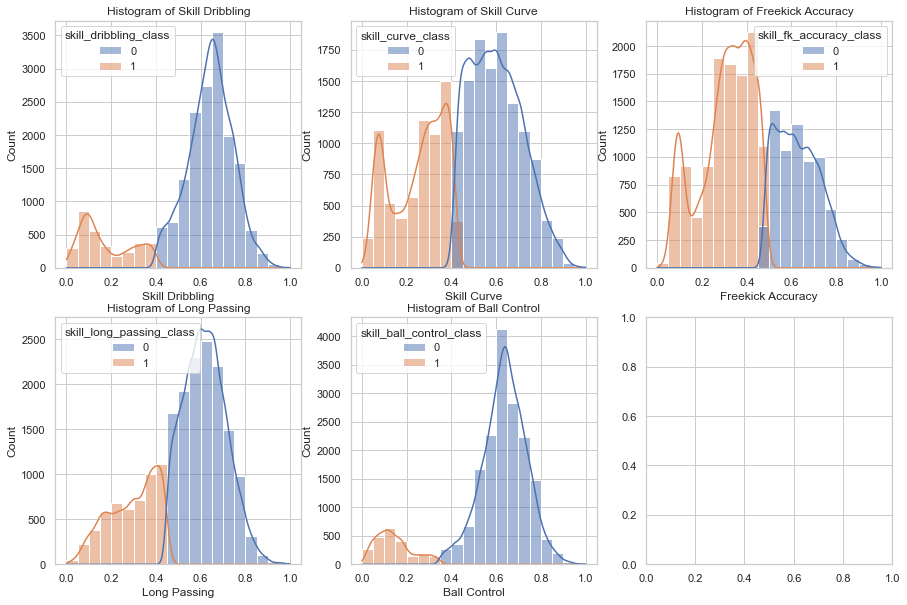

In [200]:
df["skill_dribbling_class"] = gmm2.fit_predict(df["skill_dribbling"].values.reshape(-1, 1))
df["skill_curve_class"] = gmm2.fit_predict(df["skill_curve"].values.reshape(-1, 1))
df["skill_fk_accuracy_class"] = gmm2.fit_predict(df["skill_fk_accuracy"].values.reshape(-1, 1))
df["skill_long_passing_class"] = gmm2.fit_predict(df["skill_long_passing"].values.reshape(-1, 1))
df["skill_ball_control_class"] = gmm2.fit_predict(df["skill_ball_control"].values.reshape(-1, 1))

df["skill_dribbling"] = scaler.fit_transform(df["skill_dribbling"].to_numpy().reshape(-1, 1))
df["skill_curve"] = scaler.fit_transform(df["skill_curve"].to_numpy().reshape(-1, 1))
df["skill_fk_accuracy"] = scaler.fit_transform(df["skill_fk_accuracy"].to_numpy().reshape(-1, 1))
df["skill_long_passing"] = scaler.fit_transform(df["skill_long_passing"].to_numpy().reshape(-1, 1))
df["skill_ball_control"] = scaler.fit_transform(df["skill_ball_control"].to_numpy().reshape(-1, 1))

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

sns.histplot(data=df, x='skill_dribbling', ax=axes[0, 0], binwidth=0.05, kde=True, hue="skill_dribbling_class")
axes[0, 0].set(xlabel="Skill Dribbling", ylabel="Count", title="Histogram of Skill Dribbling")

sns.histplot(data=df, x='skill_curve', ax=axes[0, 1], binwidth=0.05, kde=True, hue="skill_curve_class")
axes[0, 1].set(xlabel="Skill Curve", ylabel="Count", title="Histogram of Skill Curve")

sns.histplot(data=df, x='skill_fk_accuracy', ax=axes[0, 2], binwidth=0.05, kde=True, hue="skill_fk_accuracy_class")
axes[0, 2].set(xlabel="Freekick Accuracy", ylabel="Count", title="Histogram of Freekick Accuracy")

sns.histplot(data=df, x='skill_long_passing', ax=axes[1, 0], binwidth=0.05, kde=True, hue="skill_long_passing_class")
axes[1, 0].set(xlabel="Long Passing", ylabel="Count", title="Histogram of Long Passing")

sns.histplot(data=df, x='skill_ball_control', ax=axes[1, 1], binwidth=0.05, kde=True, hue="skill_ball_control_class")
axes[1, 1].set(xlabel="Ball Control", ylabel="Count", title="Histogram of Ball Control")

In [201]:
df[["work_rate_attack", "work_rate_defense"]] = df["work_rate"].str.split("/", expand=True)

## Impute Missing Value

#### Impute missing age value

In [202]:
df[df["age"].isnull()].loc[: , ["age", "dob"]]

,age,dob
63,NaN,1990-10-16
860,NaN,1989-02-28
1376,NaN,1990-08-08
6876,NaN,1990-10-30
7607,NaN,1989-01-01
7608,NaN,1988-09-08
9314,NaN,1990-11-22
9315,NaN,1995-07-07
15873,NaN,1995-12-15


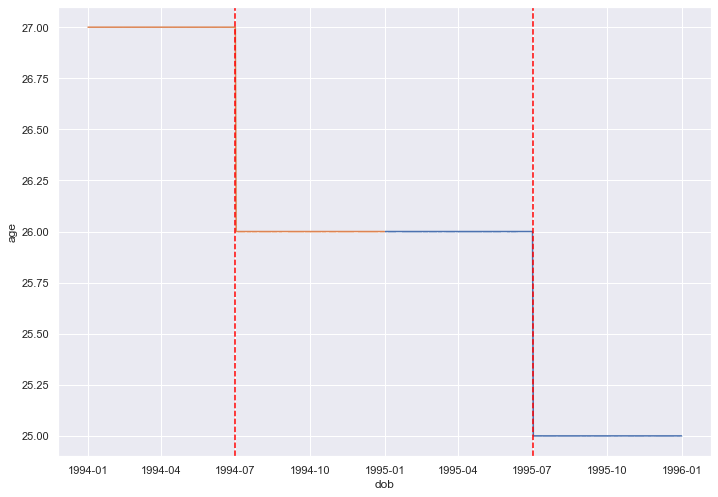

In [203]:
df_dob_1995 = df[df["dob"].dt.year == 1995].loc[:, ["dob", "age"]]
df_dob_1994 = df[df["dob"].dt.year == 1994].loc[:, ["dob", "age"]]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="dob", y="age", data=df_dob_1995)
sns.lineplot(x="dob", y="age", data=df_dob_1994)
plt.axvline(datetime.datetime(1995, 7, 1), linestyle="--", color="red")
plt.axvline(datetime.datetime(1994, 7, 1), linestyle="--", color="red")

Current year and month when the age is calculated is 2021 and 7

In [204]:
current_date_record = datetime.datetime(2021, 7, 1)

index_age_update = df[df["age"].isnull()]["age"].index
df.iloc[index_age_update, df.columns.get_loc("age")] = df[df["age"].isnull()]["dob"].apply(lambda x: relativedelta(current_date_record, x).years).values

In [205]:
df["age"] = scaler.fit_transform(df["age"].to_numpy().reshape(-1, 1))

Calculate age from dob and 2021/7/1

### Impute goal keeper player stats

In [206]:
print(df[player_stats].isnull().sum())

print(df[player_stats].isnull().apply(lambda x: functools.reduce(lambda a, b: a and b, x), axis=1).value_counts())

pace         2063
shooting     2063
passing      2063
dribbling    2063
defending    2063
physic       2063
dtype: int64
False    16813
True      2063
dtype: int64


In [207]:
goalkeeper_na_index =  df[df[player_stats].isnull().apply(lambda x: functools.reduce(lambda a, b: a and b, x), axis=1)].index

df.iloc[goalkeeper_na_index, list(map(df.columns.get_loc, player_stats))] = 0

Impute missing value value from player_stats to 0

### Impute non-goal keeper stats

In [208]:
df[df["goalkeeping_speed"].isnull()][[*goalkeeping_index, "player_positions"]]

,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_positions
1,0.056180,0.055556,0.131868,0.088889,0.068182,NaN,CAM
2,0.134831,0.133333,0.065934,0.055556,0.125000,NaN,"CAM, CM, LM"
3,0.067416,0.122222,0.065934,0.111111,0.136364,NaN,LB
4,0.134831,0.077778,0.109890,0.100000,0.056818,NaN,CB
5,0.112360,0.044444,0.120879,0.133333,0.090909,NaN,"LB, LM"
...,...,...,...,...,...,...,...
18871,0.123596,0.033333,0.098901,0.122222,0.147727,NaN,"CM, RM"
18872,0.044944,0.111111,0.120879,0.133333,0.125000,NaN,RB
18873,0.123596,0.088889,0.065934,0.088889,0.090909,NaN,"CM, CDM, CAM"
18874,0.089888,0.133333,0.120879,0.088889,0.102273,NaN,RB


In [209]:
df[df["goalkeeping_speed"].isnull()]["player_positions"].str.contains("GK").value_counts()

False    16813
Name: player_positions, dtype: int64

No goal keeper present, all are defender, midfielder, or attacker

In [210]:
player_na_index = df[df["goalkeeping_speed"].isnull()].index

df.iloc[player_na_index, df.columns.get_loc("goalkeeping_speed")] = 0

Impute missing goalkeeping_speed with 0, maybe should change all value from goalkeeping_index to 0

### Impute missing player_traits & player_tags

In [211]:
player_traits_na_index = df[df["player_traits"].isnull()].index

df.iloc[player_traits_na_index, df.columns.get_loc("player_traits")] = "None"

Impute missing player_traits with "None"

In [212]:
player_tags_na_index = df[df["player_tags"].isnull()]["player_tags"].index

df.iloc[player_tags_na_index, df.columns.get_loc("player_tags")] = "None"

Impute missing player_tags with "None"

### Impute missing club information

In [213]:
df[[*club_information_index, "wage_eur", "long_name"]]

,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,wage_eur,long_name
0,Club Cerro Porteño,Paraguayan Primera División,1.0,GK,13.0,NaN,2021-01-01,2021.0,500.0,Jean Paulo Fernandes Filho
1,Centro Atlético Fénix,Uruguayan Primera División,1.0,CAM,18.0,NaN,2021-04-01,2021.0,500.0,Rodrigo Nahuel Amaral Pereira
2,AC Sparta Praha,Czech Republic Gambrinus Liga,1.0,SUB,36.0,NaN,2020-05-01,2023.0,500.0,Adam Karabec
3,Shakhtar Donetsk,Ukrainian Premier League,1.0,SUB,44.0,NaN,2016-07-20,2025.0,500.0,Viktor Korniienko
4,Dinamo Zagreb,Croatian Prva HNL,1.0,SUB,55.0,NaN,2017-07-07,2024.0,500.0,Dino Perić
...,...,...,...,...,...,...,...,...,...,...
18871,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Marius Mihai Marin
18872,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Birkir Már Sævarsson
18873,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Marko Seufatu Nikola Stamenic
18874,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Storm Roux


In [214]:
club_loaned_from_na_index = df[df["club_loaned_from"].isnull()].index

df.iloc[club_loaned_from_na_index, df.columns.get_loc("club_loaned_from")] = "None"

Impute missing club_loaned_from with "None

In [215]:
df[["league_level", "league_name", "club_name", "club_position", "club_jersey_number", "wage_eur"]].isnull().apply(lambda x: functools.reduce(lambda a, b: a and b, x), axis=1).value_counts()

False    18815
True        61
dtype: int64

Player that is not in a club, does not have league_level, league_name, club_name, club_position, club_jersey_number, wage_eur

Impute missing club_name, league_level, club_position, league_name, club_jersey_number, club_contract_valid_until (partial), club_joined (partial)

In [216]:
club_na_index = df[df["club_name"].isnull()].index

club_none_columns = ["club_name", "league_level", "club_position", "league_name", "club_jersey_number", "club_joined", "club_contract_valid_until"]

df.iloc[club_na_index, list(map(df.columns.get_loc, club_none_columns))] = "None"

df.iloc[club_na_index, df.columns.get_loc("wage_eur")] = 0

Impute missing data from clube_none_columns with "None" and wage_eur with 0

Impute other missing club_joined, club_contract_valid_until

In [217]:
df[["club_joined", "club_contract_valid_until"]].isnull().apply(lambda x: functools.reduce(lambda a, b: a and b, x), axis=1).value_counts()

False    18876
dtype: int64

In [218]:
club_joined_na_index = df[df["club_joined"].isnull()].index
club_contract_valid_until_na_index = df[df["club_contract_valid_until"].isnull()].index

df.iloc[club_joined_na_index, df.columns.get_loc("club_joined")] = "None"

df.iloc[club_contract_valid_until_na_index, df.columns.get_loc("club_contract_valid_until")] = "None"

Impute missing data from club_joined and club_contract_valid_until with "None"

Impute missing league_name

In [219]:
league_name_na_index = df[df["league_name"].isnull()].index

league_name_append = ["Finnish Veikkausliiga", "Chilian Campeonato Nacional", "USA Major League Soccer", "Polish T-Mobile Ekstraklasa", "Categoría Primera A", "Indian Super League", "German 3. Bundesliga", "German 3. Bundesliga", "Norwegian Eliteserien", "Chilian Campeonato Nacional", "Categoría Primera A", "Korean K League 1", "Holland Eredivisie", "USA Major League Soccer", "Australian Hyundai A-League", "Australian Hyundai A-League", "Scottish Premiership", "Polish T-Mobile Ekstraklasa", "German 3. Bundesliga", "English League One", "Korean K League 1", "English League One", "English League One", "Scottish Premiership", "English League One", "Mexican Liga MX", "English League One", "English League One"]

df.iloc[league_name_na_index, df.columns.get_loc("league_name")] = league_name_append

Impute missing league_name manually by referencing google

### Impute missing nation information

In [220]:
nation_na_columns = ["nation_position", "nation_jersey_number"]

nation_na_index = df[df["nation_position"].isnull()].index

df.iloc[nation_na_index, list(map(df.columns.get_loc, nation_na_columns))] = "None"

Impute nation_na_columns with "None"

### Impute missing relase_clause

In [221]:
release_clause_na_index = df[df["release_clause_eur"].isnull()].index

df.iloc[release_clause_na_index, df.columns.get_loc("release_clause_eur")] = "None"

impute release_clause_eur with "None"

### Impute missing value_eur

In [222]:
q_high = df["value_eur"].quantile(0.99)
q_low = df["value_eur"].quantile(0.01)

trimmed_value_eur = df[(df["value_eur"] < q_high) & (df["value_eur"] > q_low)]["value_eur"]

value_eur_mean = trimmed_value_eur.mean()
value_eur_std = trimmed_value_eur.std()
value_eur_min = trimmed_value_eur.min()
value_eur_max = trimmed_value_eur.max()

a, b = 0, (value_eur_max - value_eur_mean) / value_eur_std

value_eur_na_index = df[df["value_eur"].isnull()].index

df.iloc[value_eur_na_index, df.columns.get_loc("value_eur")] = truncnorm.rvs(a, b, size=len(value_eur_na_index)) * value_eur_std + value_eur_mean

Impute missing value_eur with samples from truncated normal distribution value_eur

### Impute missing goalkeeping_speed_class, shooting_class, and defending_class

In [223]:
df.iloc[df[df["goalkeeping_speed_class"].isna()].index, df.columns.get_loc("goalkeeping_speed_class")] = 2.0

In [224]:
df.iloc[df[df["shooting_class"].isna()].index, df.columns.get_loc("shooting_class")] = 2.0

In [225]:
df.iloc[df[df["defending_class"].isna()].index, df.columns.get_loc("defending_class")] = 2.0

## Handle Noisy Data

In [226]:
bin_label = ["0% ~ 20%", "20% ~ 40%", "40% ~ 60%", "60% ~ 80%", "80% ~ 100%"]
df["value_eur_bins"] = pd.qcut(df["value_eur"], q=5, labels=bin_label)

In [227]:
bin_label = ["0% ~ 20%", "20% ~ 40%", "40% ~ 60%", "60% ~ 80%", "80% ~ 100%"]
df["wage_eur_bins"] = pd.qcut(df["wage_eur"], q=5, labels=bin_label)

In [228]:
df["release_clause_eur_bins"] = "None"
bin_label = ["0% ~ 20%", "20% ~ 40%", "40% ~ 60%", "60% ~ 80%", "80% ~ 100%"]
df.iloc[df[df["release_clause_eur"] != "None"].index, df.columns.get_loc("release_clause_eur_bins")] = pd.qcut(df[df["release_clause_eur"] != "None"]["release_clause_eur"].astype("float"), q=5, labels=bin_label)
df.iloc[df[df["release_clause_eur"].isna()].index, df.columns.get_loc("release_clause_eur")] = "None"

In [229]:
df.iloc[df[df["release_clause_eur"] != "None"].index, df.columns.get_loc("release_clause_eur")] = scaler.fit_transform(np.log(df[df["release_clause_eur"] != "None"]["release_clause_eur"].astype(float).values.reshape(-1, 1)))

In [230]:
df.iloc[df["value_eur"].dropna().index, df.columns.get_loc("value_eur")] = scaler.fit_transform(np.log(df["value_eur"].values.reshape(-1, 1)))

In [231]:
df.iloc[df[df["wage_eur"] != 0].index, df.columns.get_loc("wage_eur")] = np.log(df[df["wage_eur"] != 0]["wage_eur"].values.reshape(-1, 1))
df["wage_eur"] = scaler.fit_transform(df["wage_eur"].values.reshape(-1, 1))


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Work Rate Defense'),
 Text(0.5, 1.0, 'Bar Plot of Work Rate Defense')]

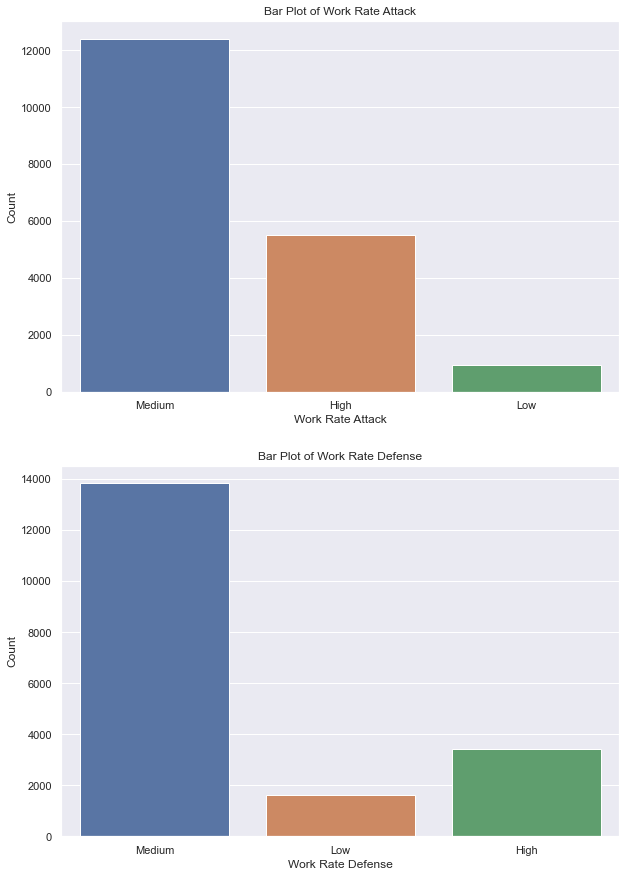

In [243]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 15)

sns.countplot(data=df, x='work_rate_attack', ax=axes[0])
axes[0].set(xlabel="Work Rate Attack", ylabel="Count", title="Bar Plot of Work Rate Attack")

sns.countplot(data=df, x='work_rate_defense', ax=axes[1])
axes[1].set(xlabel="Work Rate Defense", ylabel="Count", title="Bar Plot of Work Rate Defense")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Release Clause Euro'),
 Text(0.5, 1.0, 'Bar Plot of Release Clause Euro')]

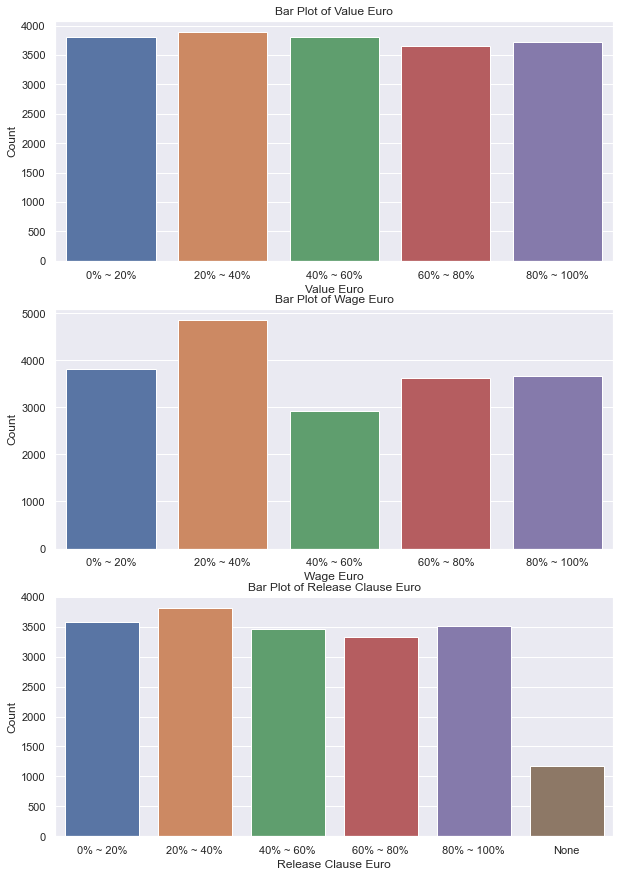

In [250]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(10, 15)

orders = ["0% ~ 20%", "20% ~ 40%", "40% ~ 60%", "60% ~ 80%", "80% ~ 100%"]
orders2 = ["0% ~ 20%", "20% ~ 40%", "40% ~ 60%", "60% ~ 80%", "80% ~ 100%", "None"]

sns.countplot(data=df, x='value_eur_bins', ax=axes[0], order=orders)
axes[0].set(xlabel="Value Euro", ylabel="Count", title="Bar Plot of Value Euro")

sns.countplot(data=df, x='wage_eur_bins', ax=axes[1], order=orders)
axes[1].set(xlabel="Wage Euro", ylabel="Count", title="Bar Plot of Wage Euro")

sns.countplot(data=df, x='release_clause_eur_bins', ax=axes[2], order=orders2)
axes[2].set(xlabel="Release Clause Euro", ylabel="Count", title="Bar Plot of Release Clause Euro")